In [181]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [182]:
df=pd.read_csv("loans_data_new.csv")
df.head(3)

ID   Status  Amount  ApplicationSignedHour  ApplicationSignedWeekday  \
0   0  Current  5000.0                     12                         4   
1   2   Repaid   530.0                     14                         2   
2   3  Current  5500.0                     22                         4   

      City Country CreditScoreEsEquifaxRisk DateOfBirth  DebtToIncome  ...  \
0    AESPA      EE                      NaN  21-11-1975         51.52  ...   
1    PÄRNU      EE                      NaN  25-10-1969         30.32  ...   
2  TALLINN      EE                      NaN  22-11-1965         29.57  ...   

   MaritalStatus NewCreditCustomer NoOfPreviousLoansBeforeLoan  \
0            4.0             False                           1   
1            1.0              True                           0   
2            4.0              True                           0   

   OccupationArea  UseOfLoan  VerificationType   WorkExperience  \
0             8.0          0               1.0      15To25Years   
1             1.0          2               4.0      15To25Years   
2            13.0          2               3.0  MoreThan25Years   

   PreviousScore  Defaulted  DefaultDate  
0         0.0957      False          NaN  
1         0.1034      False          NaN  
2         0.0772      False          NaN  

[3 rows x 32 columns]

# Data Preprocessing part 1


In [183]:
#Remove ID column
df=df.drop("ID",axis=1)
df.head(3)

Status  Amount  ApplicationSignedHour  ApplicationSignedWeekday     City  \
0  Current  5000.0                     12                         4    AESPA   
1   Repaid   530.0                     14                         2    PÄRNU   
2  Current  5500.0                     22                         4  TALLINN   

  Country CreditScoreEsEquifaxRisk DateOfBirth  DebtToIncome  Education  ...  \
0      EE                      NaN  21-11-1975         51.52        4.0  ...   
1      EE                      NaN  25-10-1969         30.32        4.0  ...   
2      EE                      NaN  22-11-1965         29.57        4.0  ...   

  MaritalStatus NewCreditCustomer  NoOfPreviousLoansBeforeLoan  \
0           4.0             False                            1   
1           1.0              True                            0   
2           4.0              True                            0   

   OccupationArea  UseOfLoan  VerificationType   WorkExperience  \
0             8.0          0               1.0      15To25Years   
1             1.0          2               4.0      15To25Years   
2            13.0          2               3.0  MoreThan25Years   

   PreviousScore  Defaulted DefaultDate  
0         0.0957      False         NaN  
1         0.1034      False         NaN  
2         0.0772      False         NaN  

[3 rows x 31 columns]

In [184]:
#checking number of unique values present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27917 entries, 0 to 27916
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Status                             27917 non-null  object 
 1   Amount                             27917 non-null  float64
 2   ApplicationSignedHour              27917 non-null  int64  
 3   ApplicationSignedWeekday           27917 non-null  int64  
 4   City                               27726 non-null  object 
 5   Country                            27917 non-null  object 
 6   CreditScoreEsEquifaxRisk           5725 non-null   object 
 7   DateOfBirth                        27917 non-null  object 
 8   DebtToIncome                       27876 non-null  float64
 9   Education                          27876 non-null  float64
 10  EmploymentDurationCurrentEmployer  27224 non-null  object 
 11  EmploymentPosition                 27529 non-null  obj

In [185]:
df.shape

(27917, 31)

In [186]:
#Check the number of unique value from all of the object datatype
df.select_dtypes("object").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27917 entries, 0 to 27916
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Status                             27917 non-null  object
 1   City                               27726 non-null  object
 2   Country                            27917 non-null  object
 3   CreditScoreEsEquifaxRisk           5725 non-null   object
 4   DateOfBirth                        27917 non-null  object
 5   EmploymentDurationCurrentEmployer  27224 non-null  object
 6   EmploymentPosition                 27529 non-null  object
 7   LoanDate                           27917 non-null  object
 8   WorkExperience                     27869 non-null  object
 9   DefaultDate                        9280 non-null   object
dtypes: object(10)
memory usage: 2.1+ MB


In [187]:
#Check the number of unique value from all of the object datatype
df.select_dtypes("object").nunique()

Status                                   3
City                                  4528
Country                                  4
CreditScoreEsEquifaxRisk                 6
DateOfBirth                          10923
EmploymentDurationCurrentEmployer        7
EmploymentPosition                    2767
LoanDate                              2389
WorkExperience                           6
DefaultDate                            942
dtype: int64

In [188]:
df=df.drop(columns=["DefaultDate","City","EmploymentPosition"])
df

Status  Amount  ApplicationSignedHour  ApplicationSignedWeekday  \
0      Current  5000.0                     12                         4   
1       Repaid   530.0                     14                         2   
2      Current  5500.0                     22                         4   
3       Repaid  6900.0                     15                         3   
4      Current  2655.0                     10                         3   
...        ...     ...                    ...                       ...   
27912     Late  3310.0                     22                         5   
27913     Late  2000.0                      7                         2   
27914   Repaid  1485.0                     14                         4   
27915  Current  3000.0                     20                         2   
27916     Late  1300.0                     10                         2   

      Country CreditScoreEsEquifaxRisk DateOfBirth  DebtToIncome  Education  \
0          EE                      NaN  21-11-1975         51.52        4.0   
1          EE                      NaN  25-10-1969         30.32        4.0   
2          EE                      NaN  22-11-1965         29.57        4.0   
3          EE                      NaN  05-12-1983         45.75        2.0   
4          EE                      NaN  13-07-1980         25.40        4.0   
...       ...                      ...         ...           ...        ...   
27912      FI                      NaN  23-04-1975         31.22        3.0   
27913      FI                      NaN  02-10-1976          9.40        3.0   
27914      ES                        C  05-03-1978         30.13        3.0   
27915      EE                      NaN  17-05-1957         25.35        3.0   
27916      EE                      NaN  07-10-1950         56.59        4.0   

      EmploymentDurationCurrentEmployer  ...  LoanDuration  MaritalStatus  \
0                            UpTo5Years  ...            60            4.0   
1                        MoreThan5Years  ...            60            1.0   
2                        MoreThan5Years  ...            60            4.0   
3                        MoreThan5Years  ...            60            3.0   
4                        MoreThan5Years  ...            60            3.0   
...                                 ...  ...           ...            ...   
27912                    MoreThan5Years  ...            60            3.0   
27913                        UpTo5Years  ...            60            1.0   
27914                    MoreThan5Years  ...            60            3.0   
27915                        UpTo3Years  ...            60            1.0   
27916                    MoreThan5Years  ...            48            1.0   

       NewCreditCustomer  NoOfPreviousLoansBeforeLoan  OccupationArea  \
0                  False                            1             8.0   
1                   True                            0             1.0   
2                   True                            0            13.0   
3                  False                            1            19.0   
4                   True                            0            17.0   
...                  ...                          ...             ...   
27912              False                            1             1.0   
27913               True                            0             1.0   
27914              False                            3            14.0   
27915               True                            0             1.0   
27916              False                            4            19.0   

       UseOfLoan  VerificationType   WorkExperience  PreviousScore  Defaulted  
0              0               1.0      15To25Years         0.0957      False  
1              2               4.0      15To25Years         0.1034      False  
2              2               3.0  MoreThan25Years         0.0772      False  
3              7               4.0  

In [189]:
#extracting year on DOB
df["DateOfBirth"]=df["DateOfBirth"].str[6:]
#converting into integer
df["DateOfBirth"]=df["DateOfBirth"].astype(int)

In [190]:
#extracting year on LoanDate
df["LoanDate"]=df["LoanDate"].str[6:]
#converting into integer type
df["LoanDate"]=df["LoanDate"].astype(int)

In [191]:
df.head(9)

Status  Amount  ApplicationSignedHour  ApplicationSignedWeekday Country  \
0  Current  5000.0                     12                         4      EE   
1   Repaid   530.0                     14                         2      EE   
2  Current  5500.0                     22                         4      EE   
3   Repaid  6900.0                     15                         3      EE   
4  Current  2655.0                     10                         3      EE   
5  Current  3190.0                     14                         4      EE   
6  Current   500.0                     15                         2      EE   
7   Repaid  3720.0                     11                         5      FI   
8     Late  2500.0                     10                         2      EE   

  CreditScoreEsEquifaxRisk  DateOfBirth  DebtToIncome  Education  \
0                      NaN         1975         51.52        4.0   
1                      NaN         1969         30.32        4.0   
2                      NaN         1965         29.57        4.0   
3                      NaN         1983         45.75        2.0   
4                      NaN         1980         25.40        4.0   
5                      NaN         1993         40.21        3.0   
6                      NaN         1981         50.22        2.0   
7                      NaN         1949         60.21        3.0   
8                      NaN         1991         48.60        4.0   

  EmploymentDurationCurrentEmployer  ...  LoanDuration  MaritalStatus  \
0                        UpTo5Years  ...            60            4.0   
1                    MoreThan5Years  ...            60            1.0   
2                    MoreThan5Years  ...            60            4.0   
3                    MoreThan5Years  ...            60            3.0   
4                    MoreThan5Years  ...            60            3.0   
5                         UpTo1Year  ...            60            3.0   
6                        UpTo5Years  ...            60            1.0   
7                        UpTo2Years  ...            60            4.0   
8                         UpTo1Year  ...            60            2.0   

   NewCreditCustomer  NoOfPreviousLoansBeforeLoan  OccupationArea  UseOfLoan  \
0              False                            1             8.0          0   
1               True                            0             1.0          2   
2               True                            0            13.0          2   
3              False                            1            19.0          7   
4               True                            0            17.0          2   
5              False                            2             3.0          7   
6              False                            1             1.0          5   
7               True                            0             6.0          0   
8              False                            2             3.0          6   

   VerificationType   WorkExperience  PreviousScore  Defaulted  
0               1.0      15To25Years         0.0957      False  
1               4.0      15To25Years         0.1034      False  
2               3.0  MoreThan25Years         0.0772      False  
3               4.0       5To10Years         0.0773      False  
4               4.0       5To10Years         0.1898      False  
5               4.0   LessThan2Years         0.6319      False  
6               4.0      15To25Years         0.2510      False  
7               4.0  MoreThan25Years         0.1987      False  
8               4.0        2To5Years         0.1533       True  

[9 rows x 28 columns]

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27917 entries, 0 to 27916
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Status                             27917 non-null  object 
 1   Amount                             27917 non-null  float64
 2   ApplicationSignedHour              27917 non-null  int64  
 3   ApplicationSignedWeekday           27917 non-null  int64  
 4   Country                            27917 non-null  object 
 5   CreditScoreEsEquifaxRisk           5725 non-null   object 
 6   DateOfBirth                        27917 non-null  int64  
 7   DebtToIncome                       27876 non-null  float64
 8   Education                          27876 non-null  float64
 9   EmploymentDurationCurrentEmployer  27224 non-null  object 
 10  EmploymentStatus                   27735 non-null  float64
 11  ExistingLiabilities                27917 non-null  int

In [193]:
df.select_dtypes("object").nunique()

Status                               3
Country                              4
CreditScoreEsEquifaxRisk             6
EmploymentDurationCurrentEmployer    7
WorkExperience                       6
dtype: int64

# Exploratory Data Analysis


In [194]:
# all columns with data type "object"
categorical=df.select_dtypes("object").columns.tolist()
categorical

['Status',
 'Country',
 'CreditScoreEsEquifaxRisk',
 'EmploymentDurationCurrentEmployer',
 'WorkExperience']

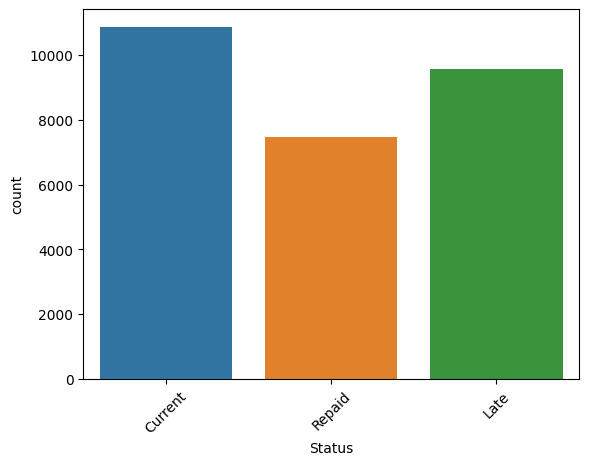

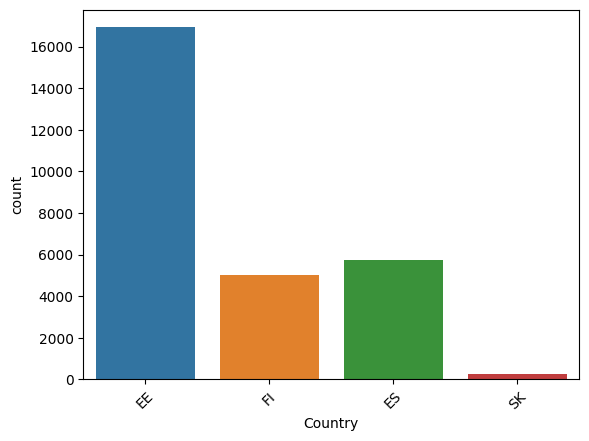

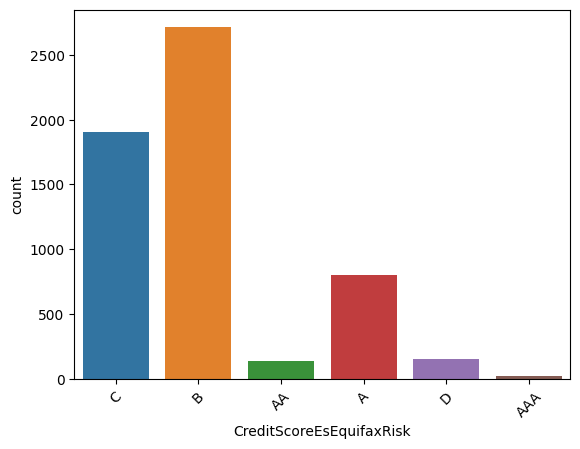

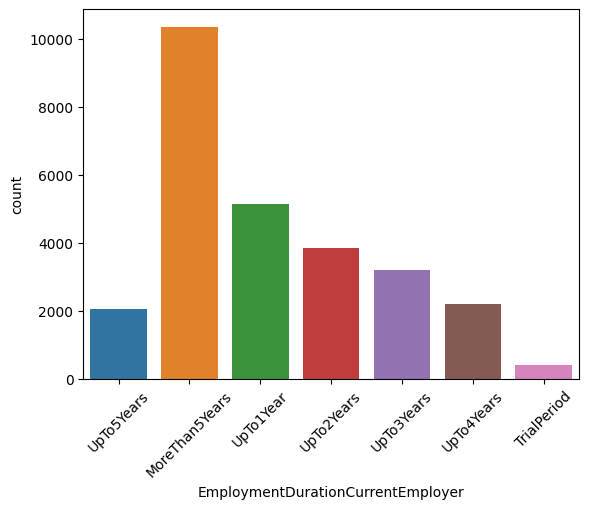

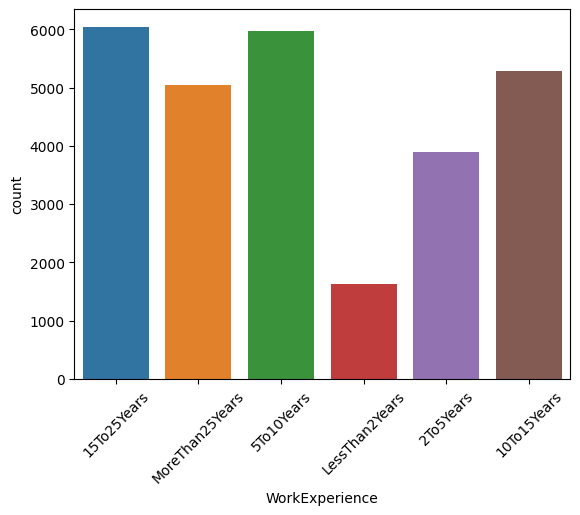

In [195]:
for col in categorical:
  sns.countplot(data=df,x=col)
  plt.xlabel(col)
  plt.ylabel("count")
  plt.xticks(rotation=45)
  plt.show()

In [196]:
#creating a box plot using seaborn for numerical var
numerical=df.select_dtypes(include=["int","float"]).columns.tolist()

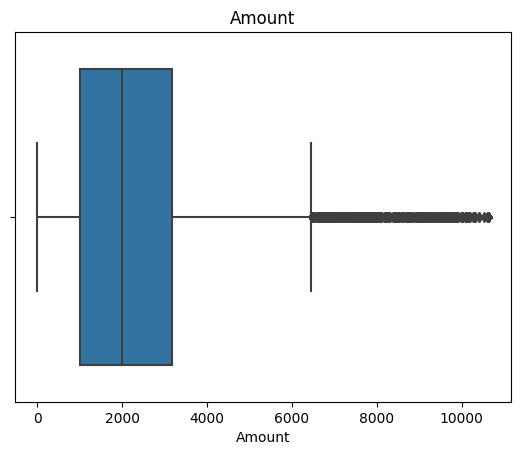

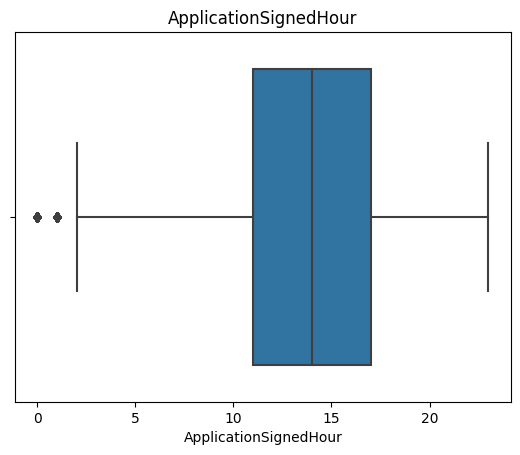

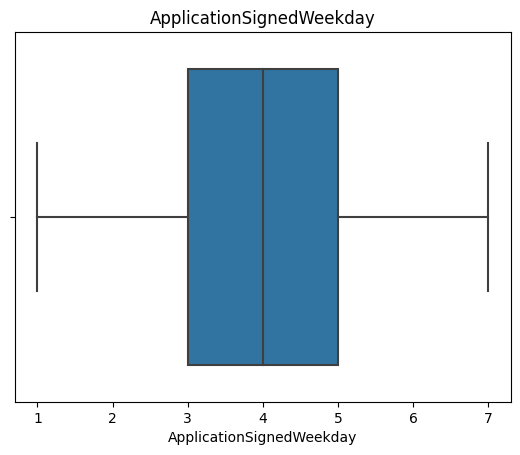

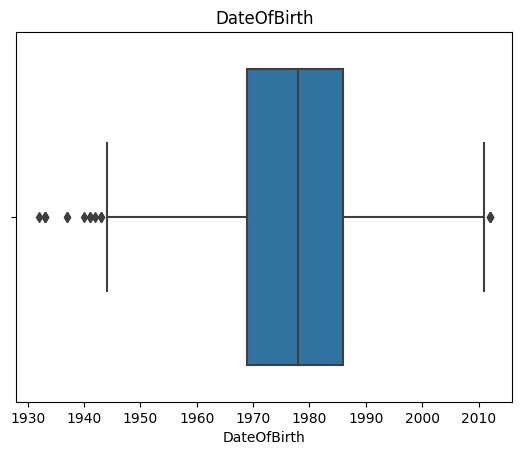

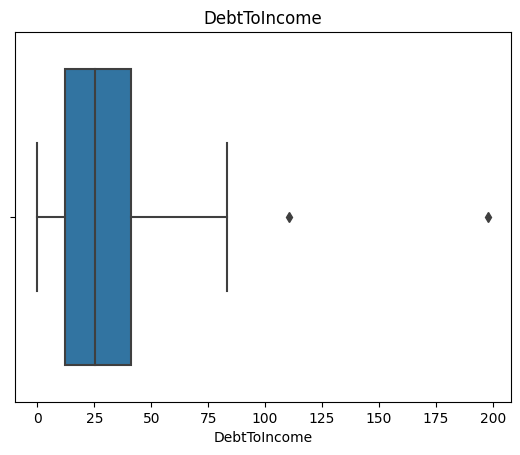

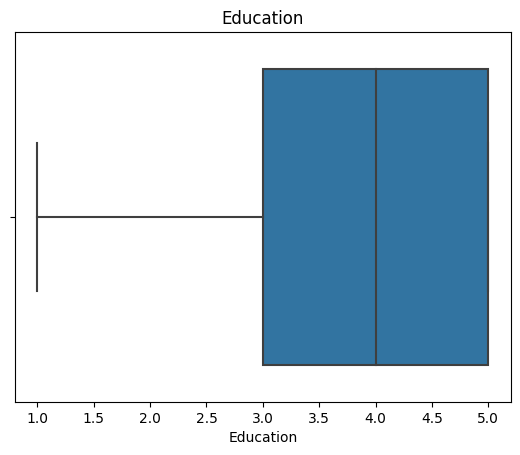

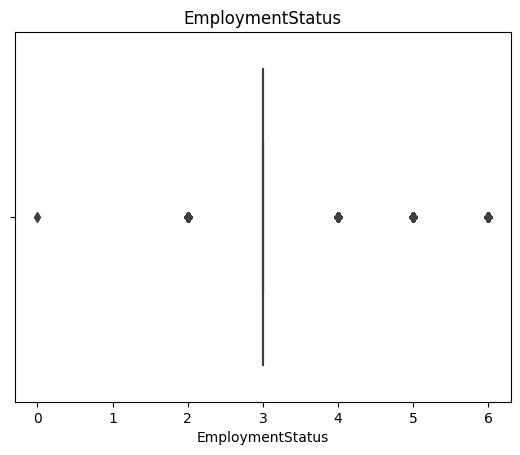

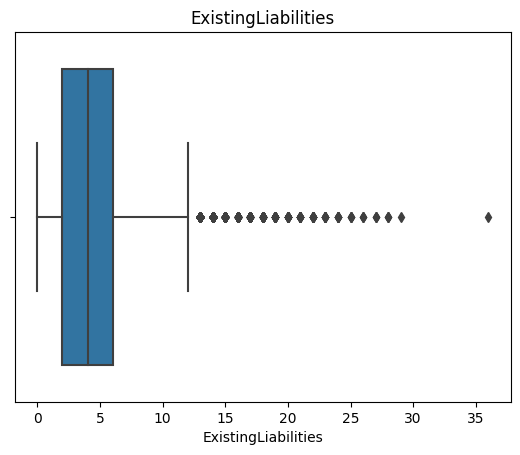

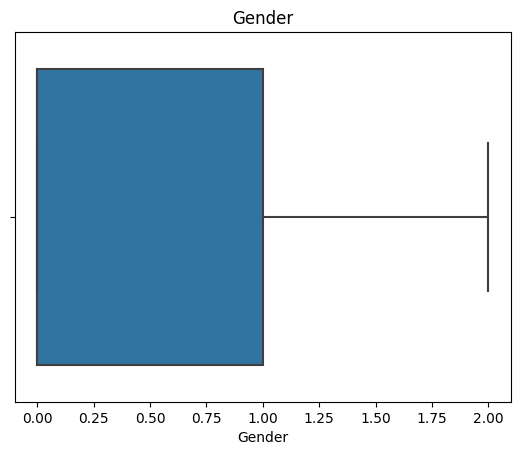

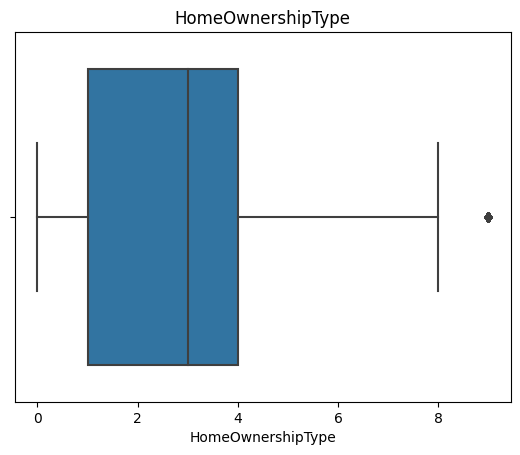

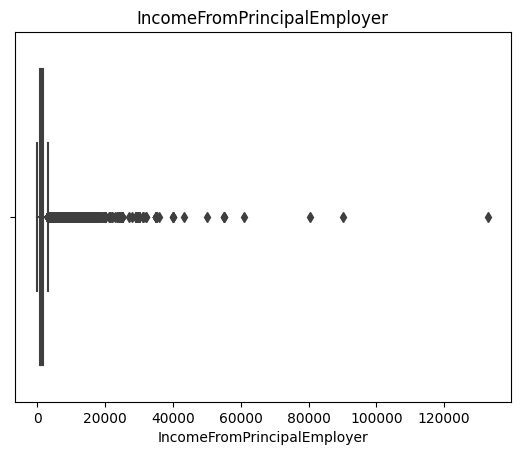

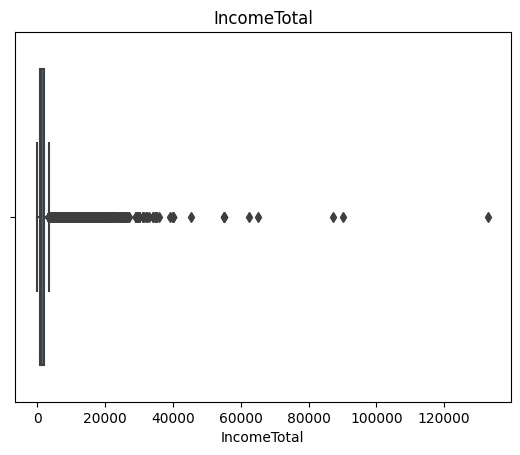

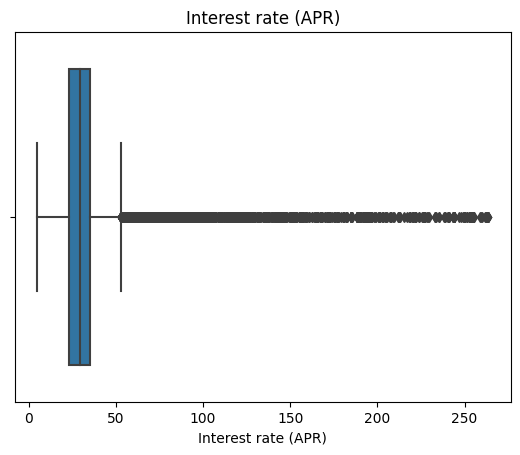

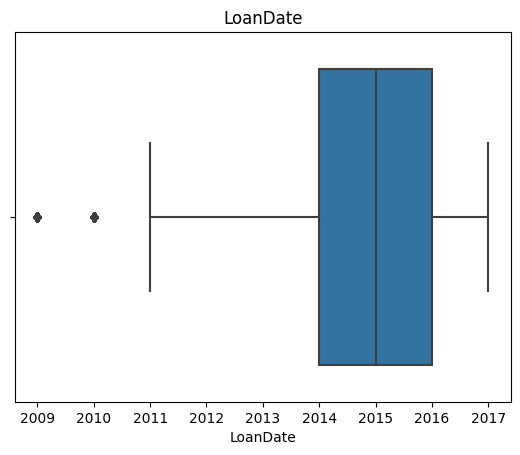

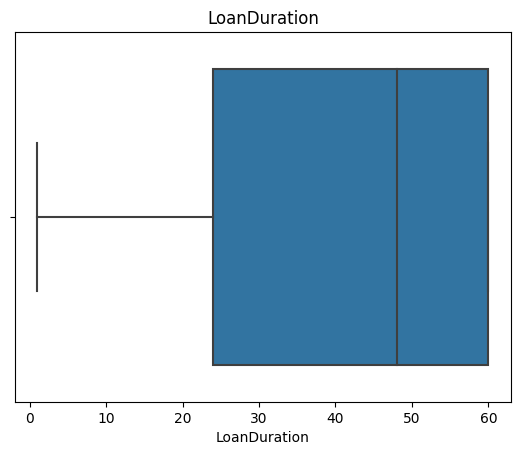

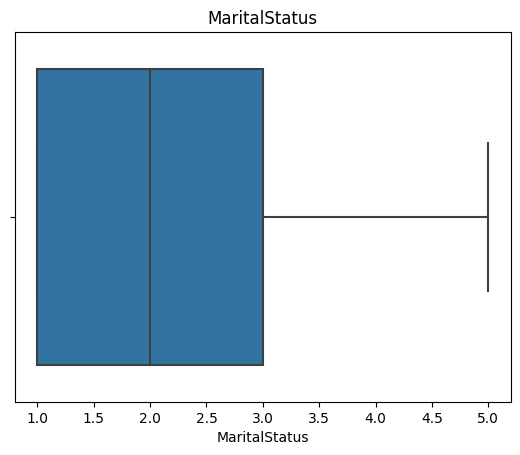

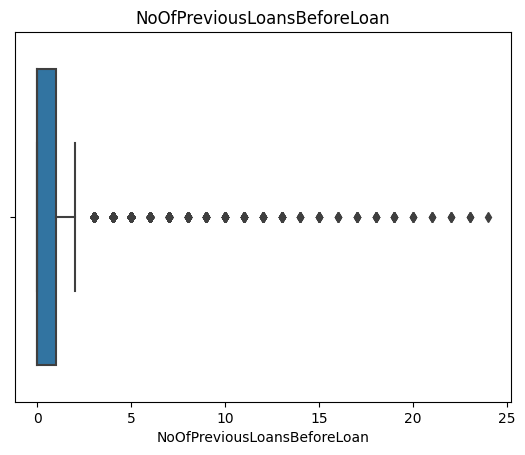

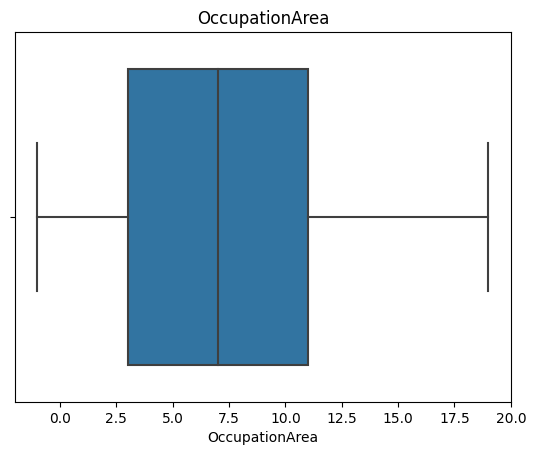

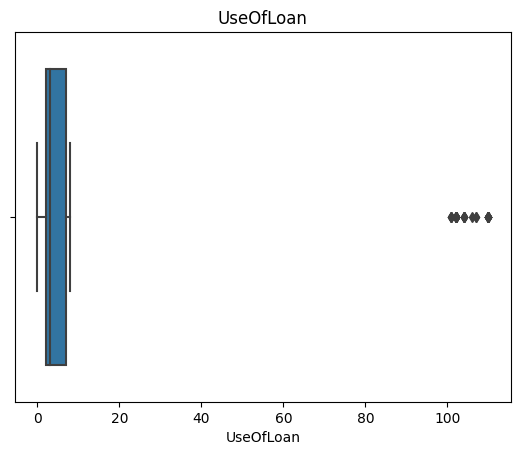

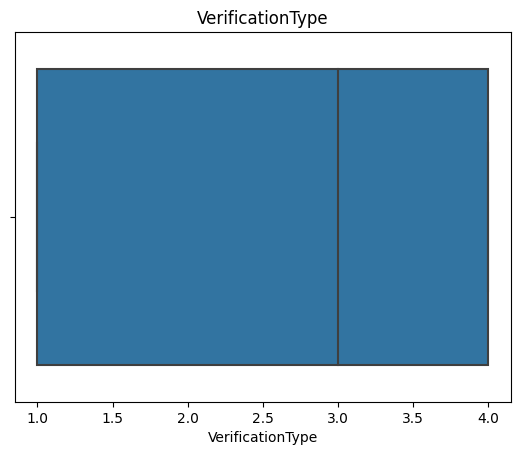

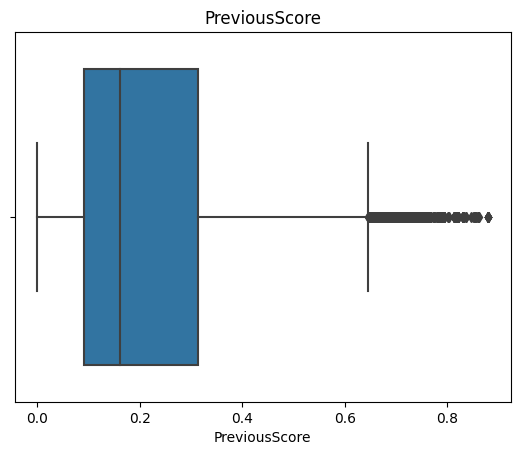

In [197]:
for i in numerical:
  sns.boxplot(data=df,x=i)
  plt.title(i)
  plt.show()

In [198]:
#creating a sub plot using seaborn for numerical values
num=df.select_dtypes(include=["int","float"]).columns.tolist()

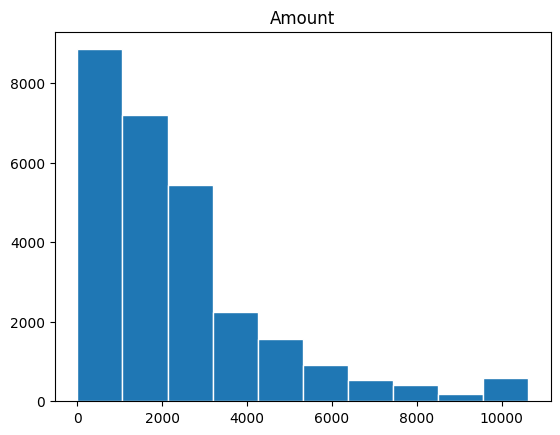

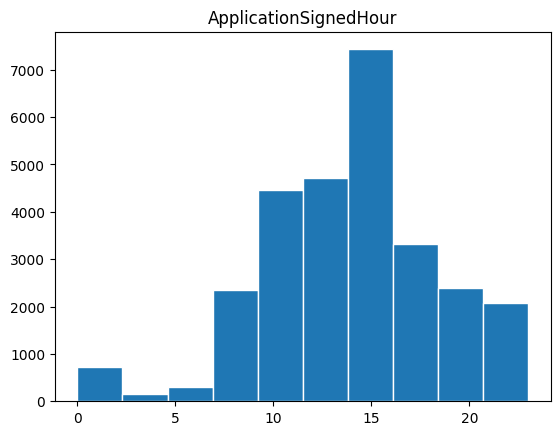

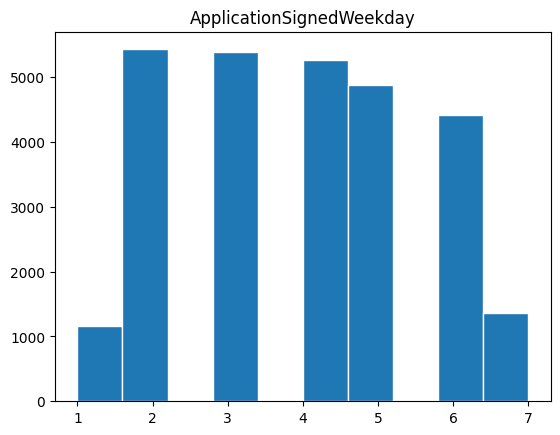

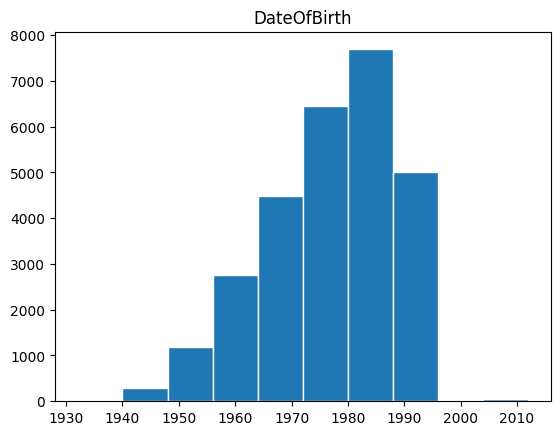

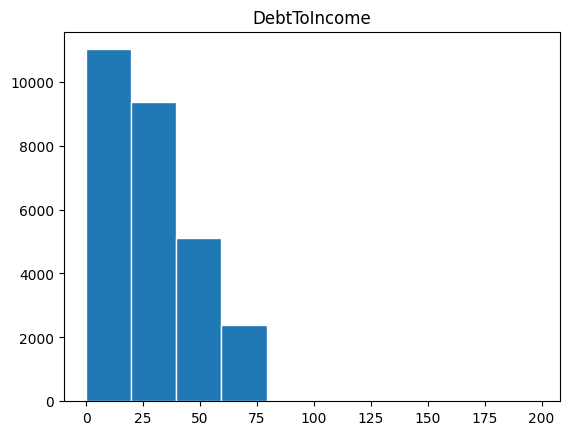

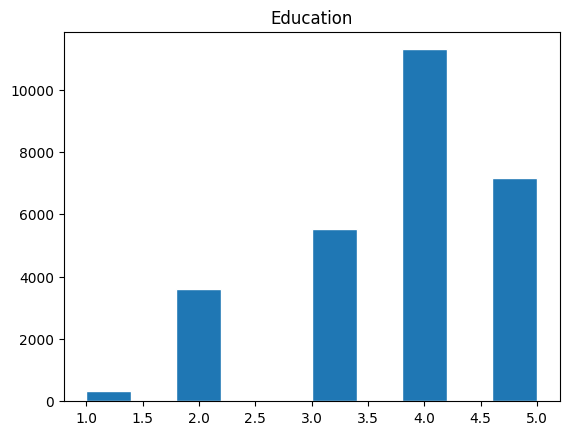

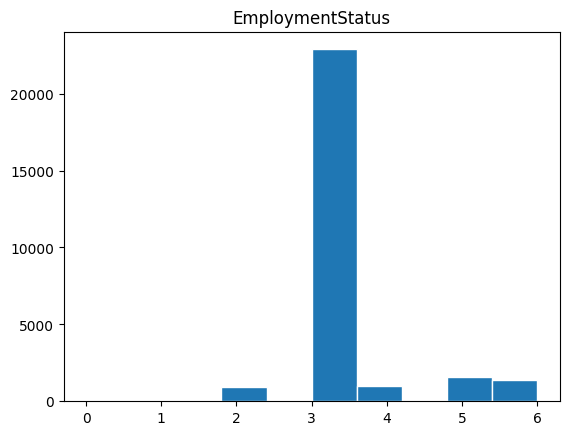

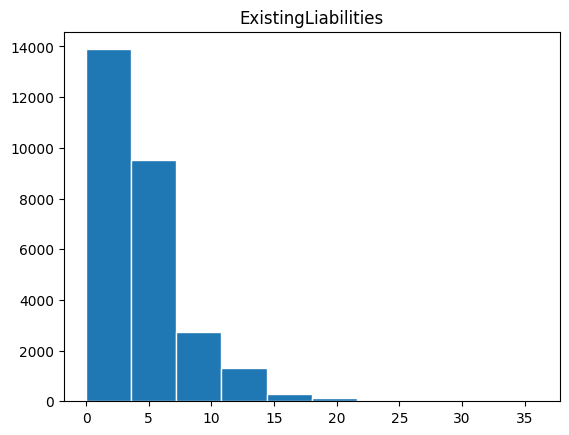

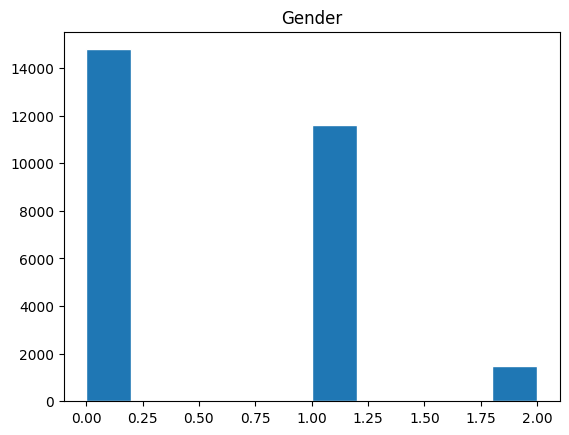

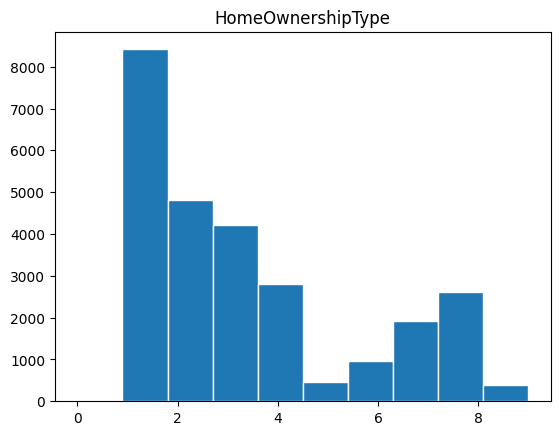

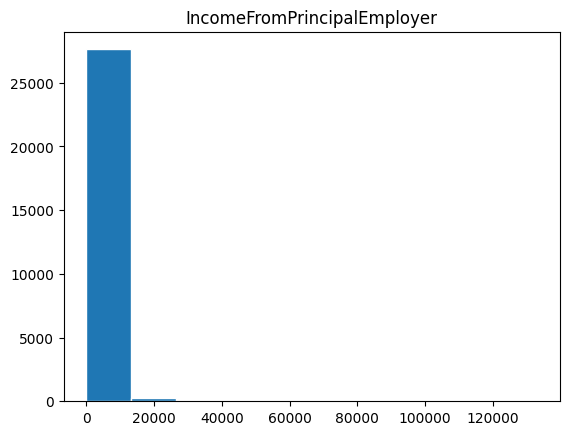

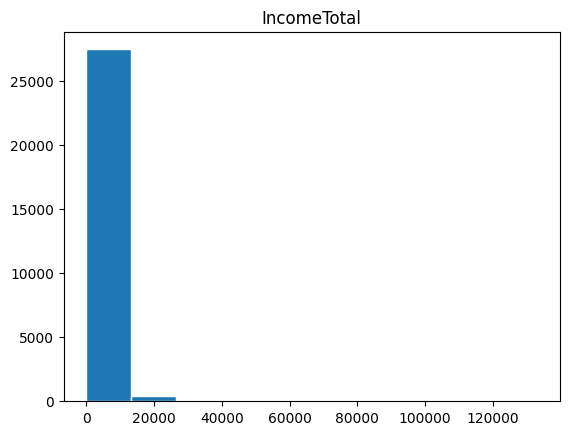

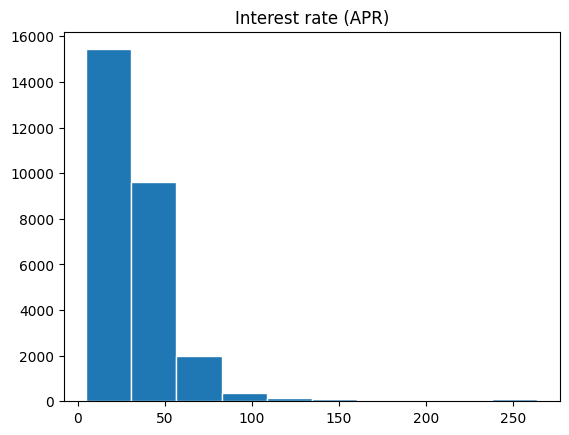

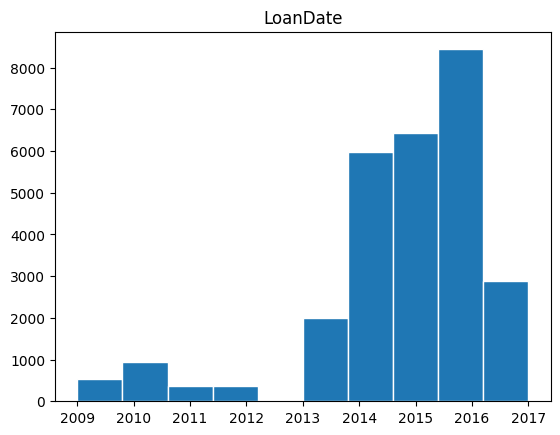

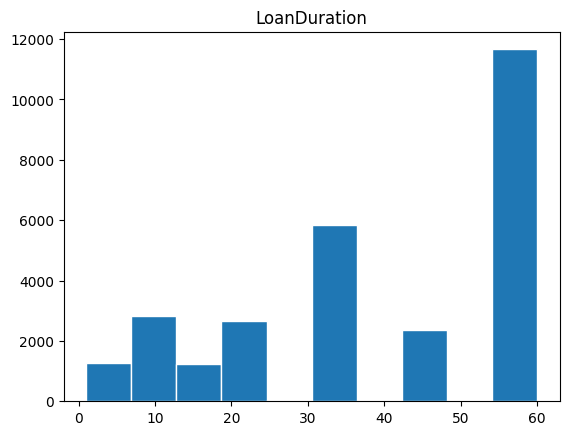

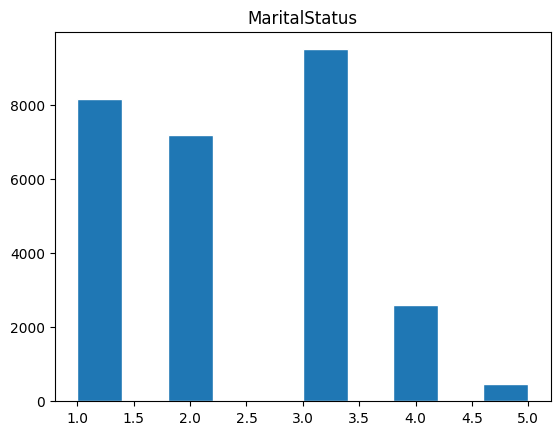

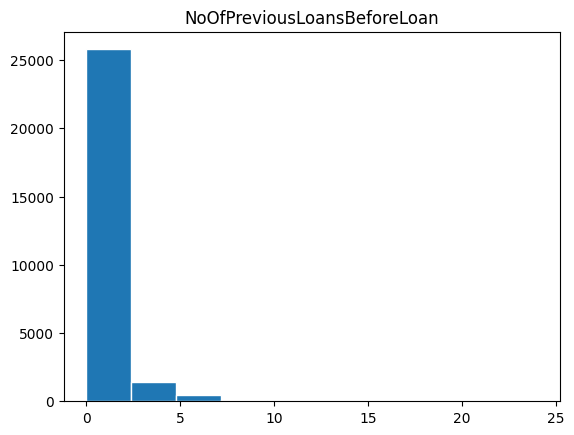

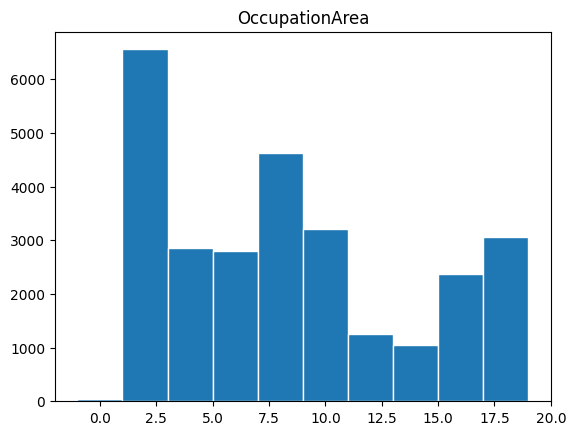

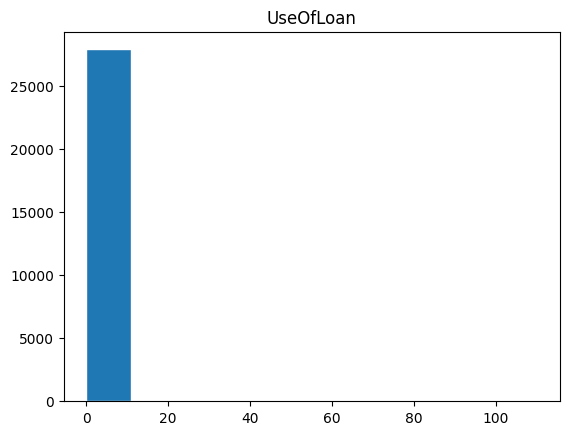

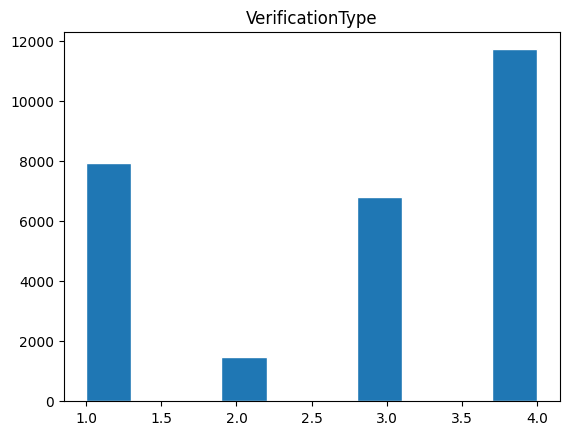

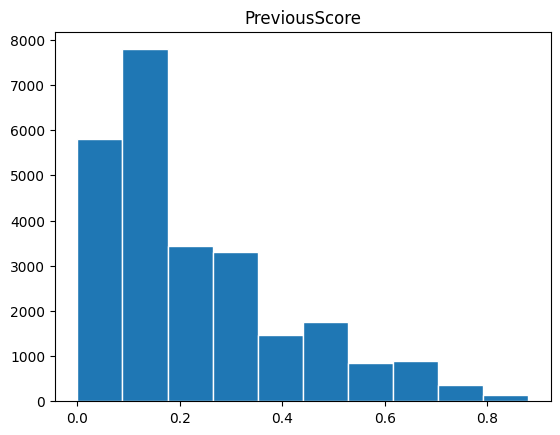

In [165]:
for i in num:
  plt.hist(data=df,x=i,edgecolor="w")
  plt.title(i)
  plt.show()

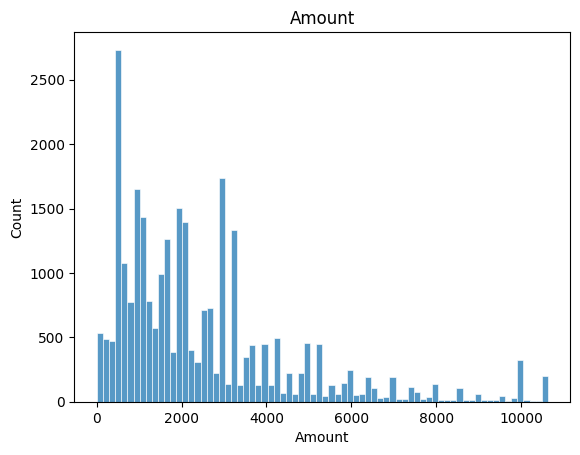

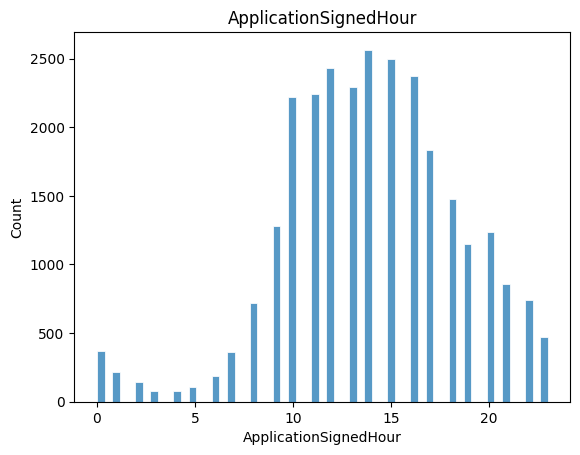

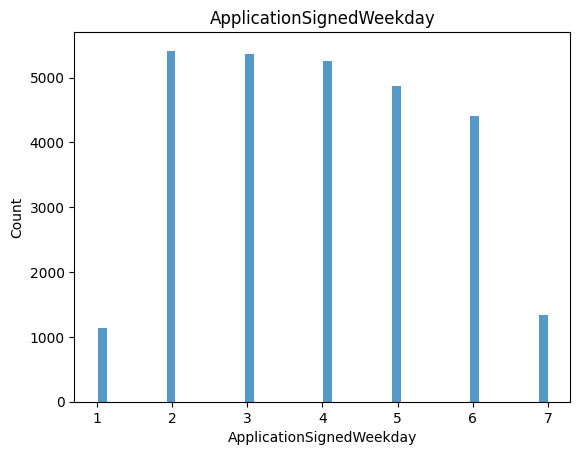

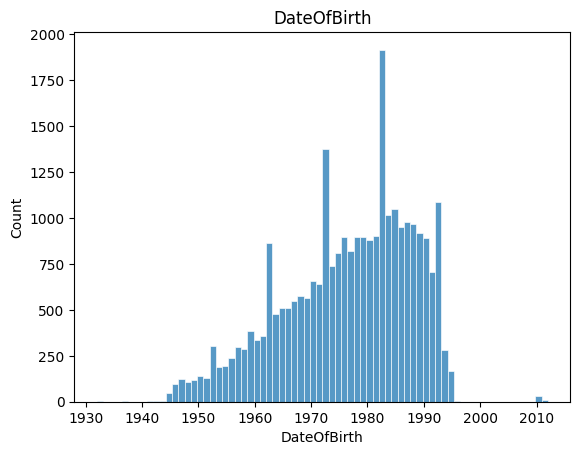

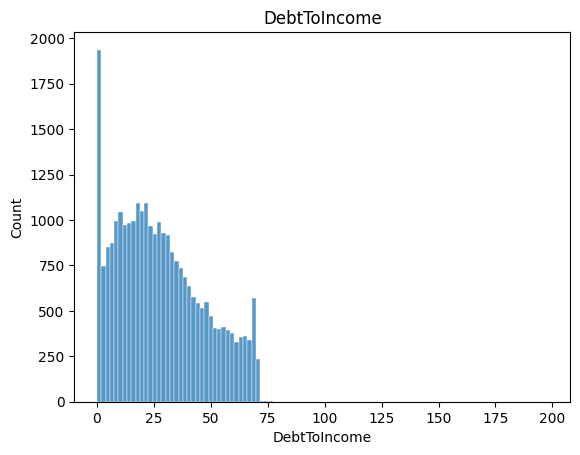

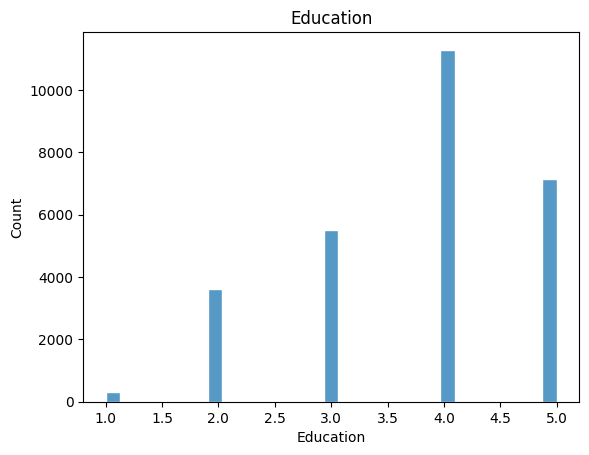

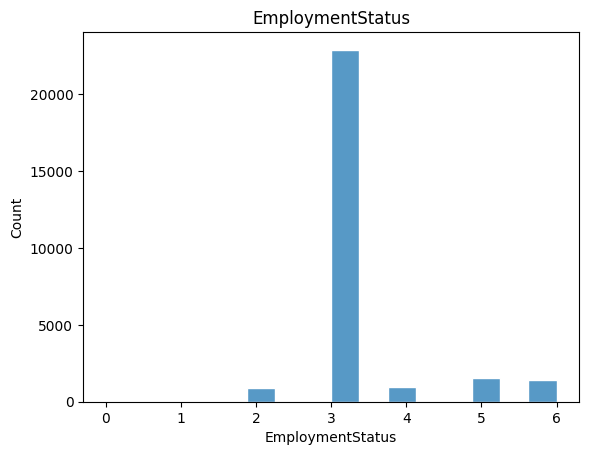

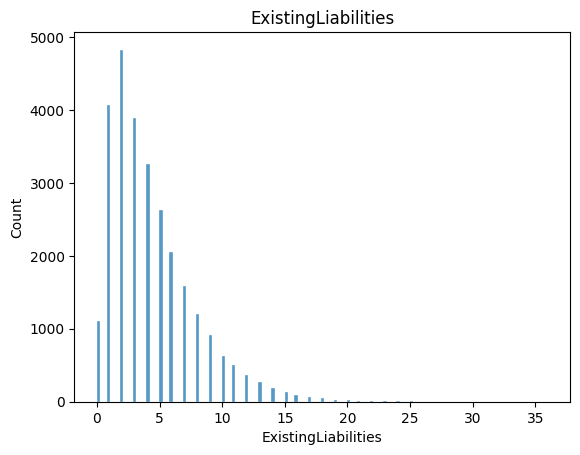

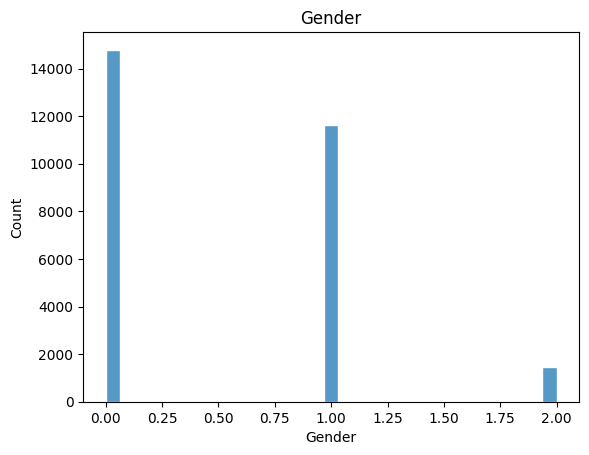

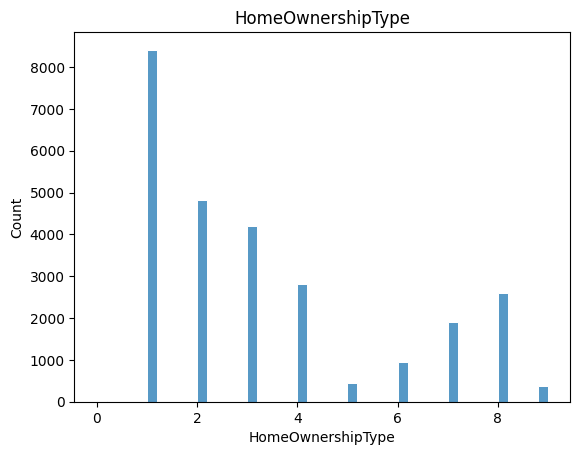

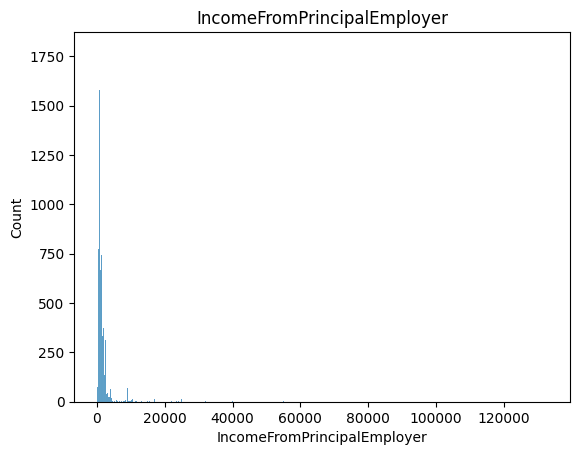

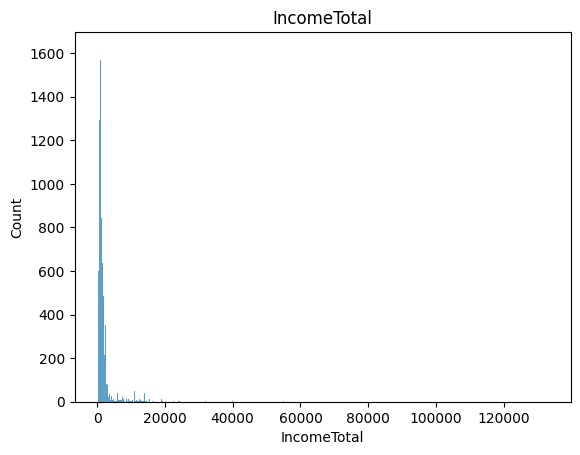

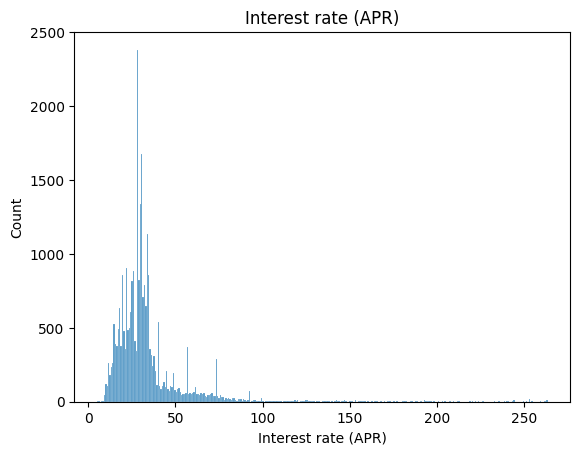

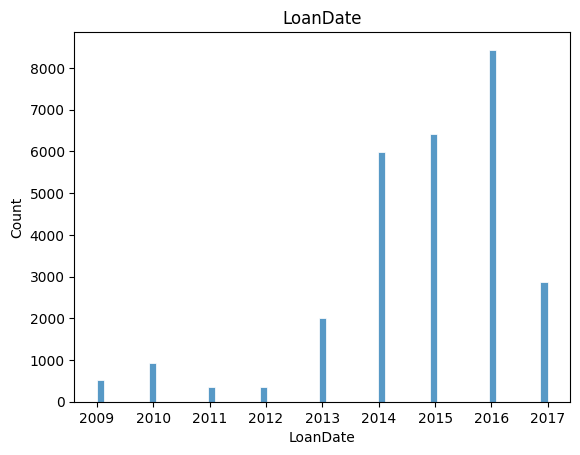

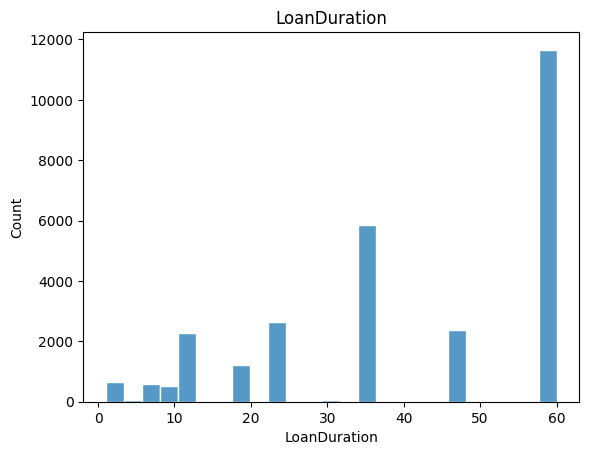

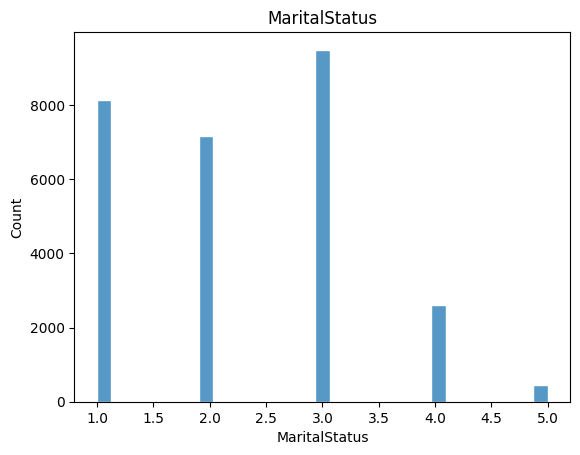

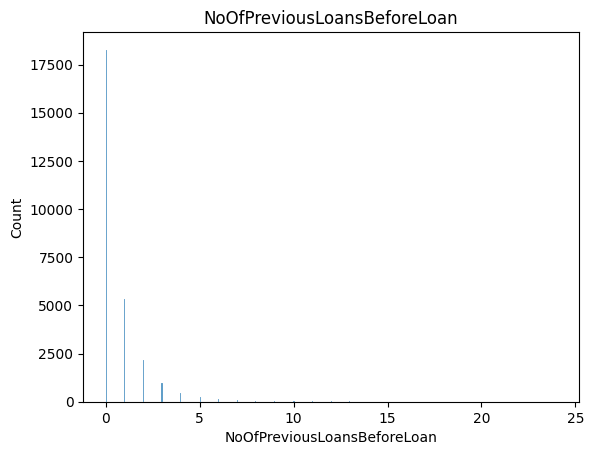

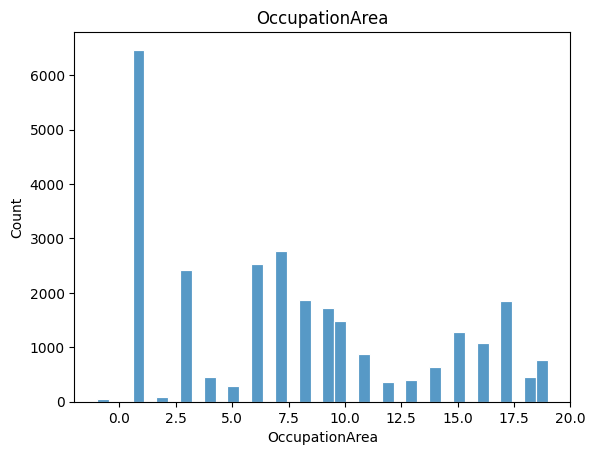

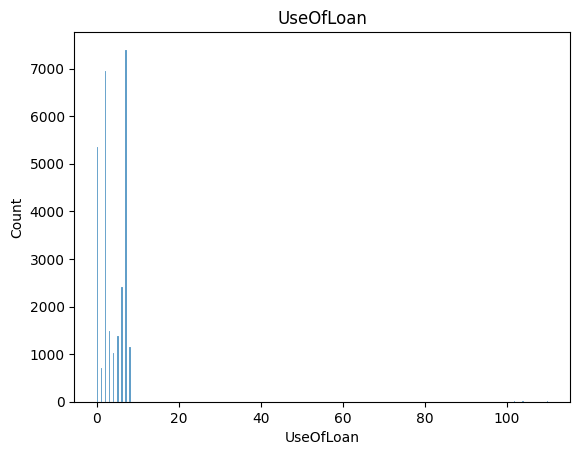

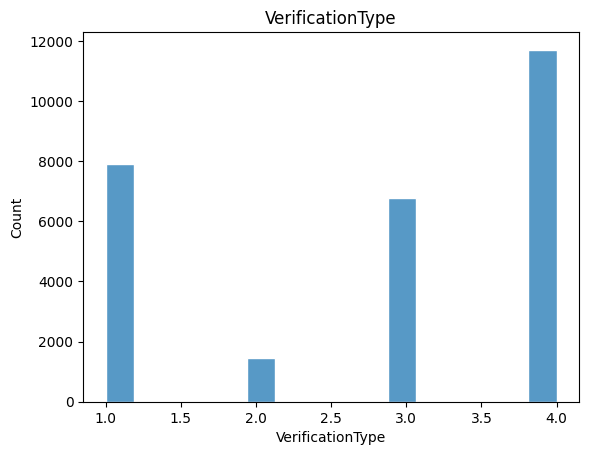

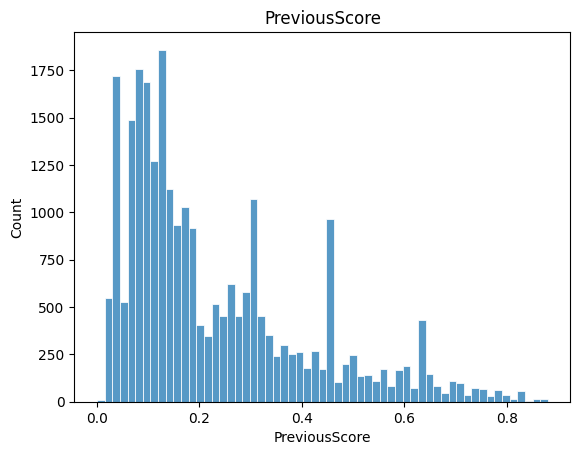

In [166]:
for i in num:
  sns.histplot(data=df,x=i,edgecolor="w")
  plt.title(i)
  plt.show()

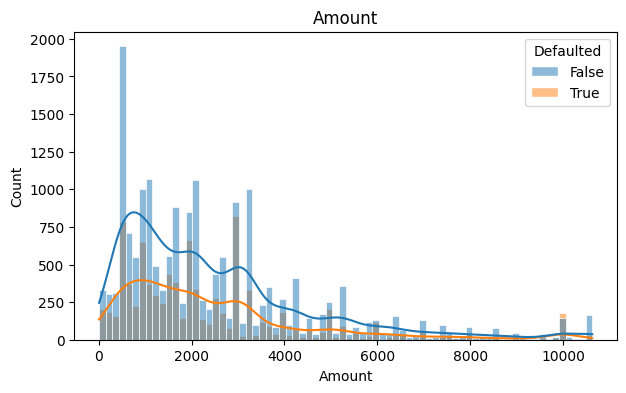

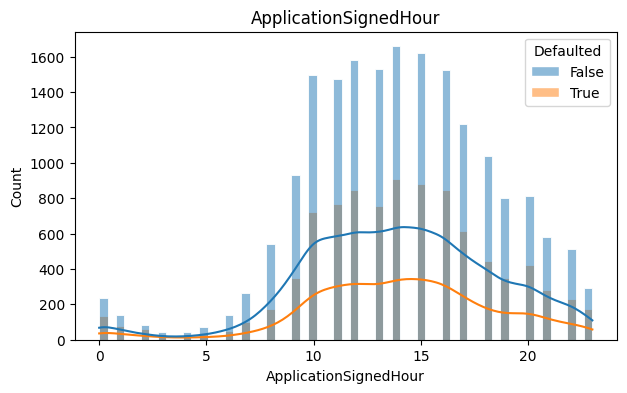

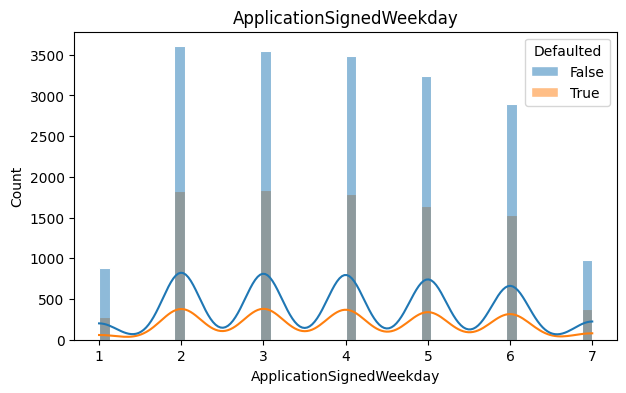

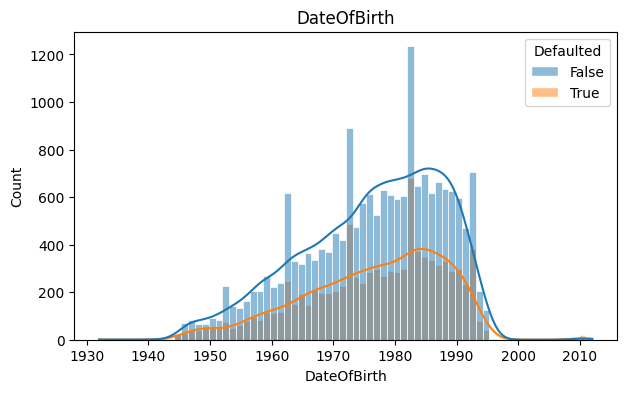

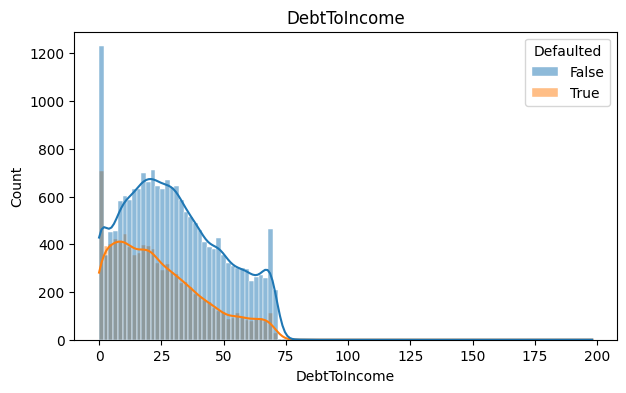

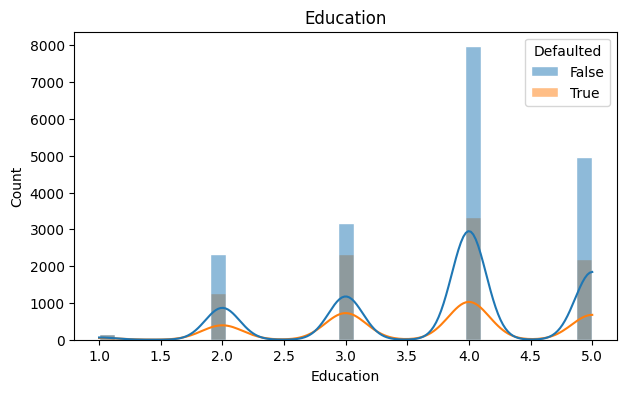

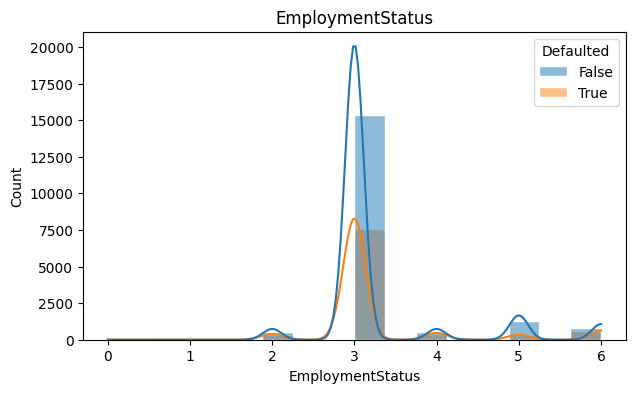

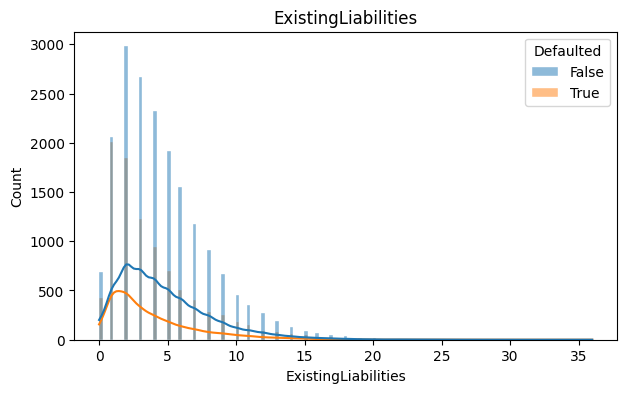

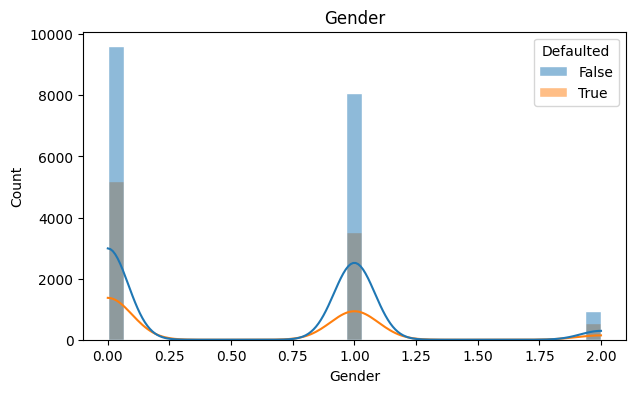

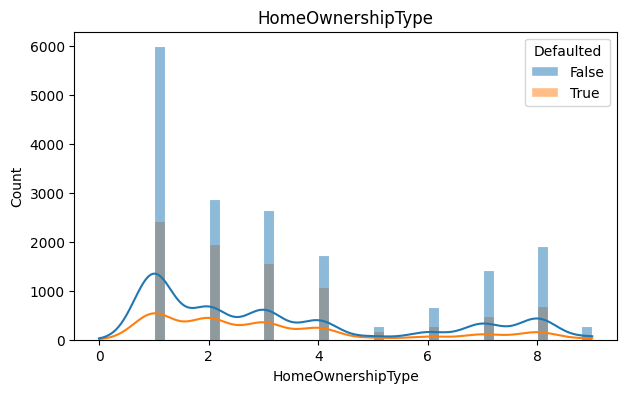

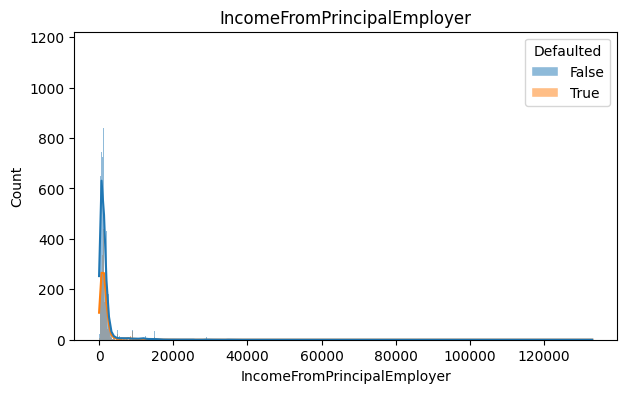

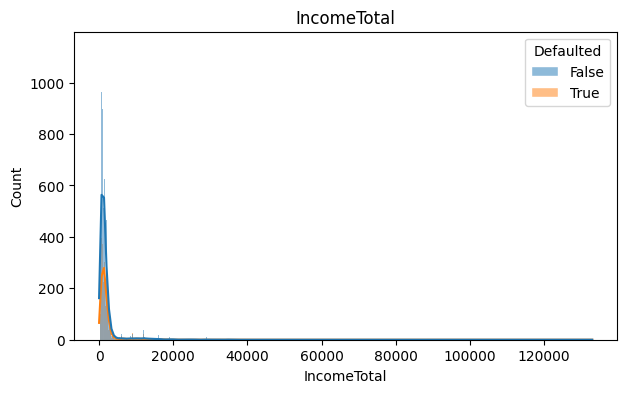

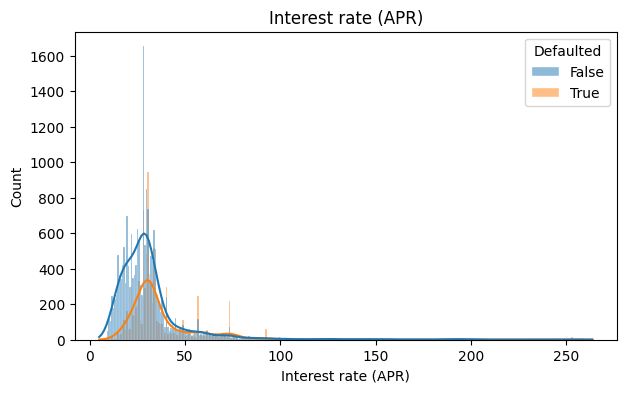

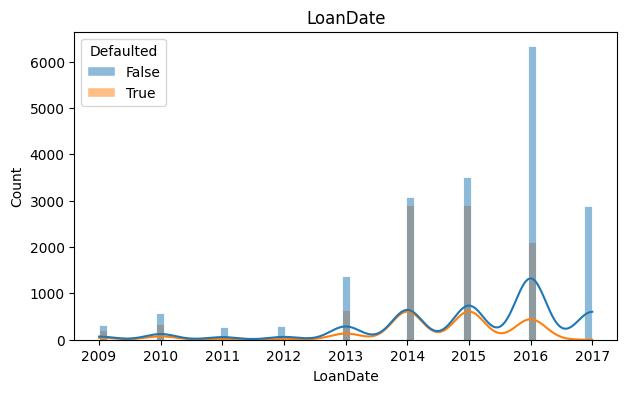

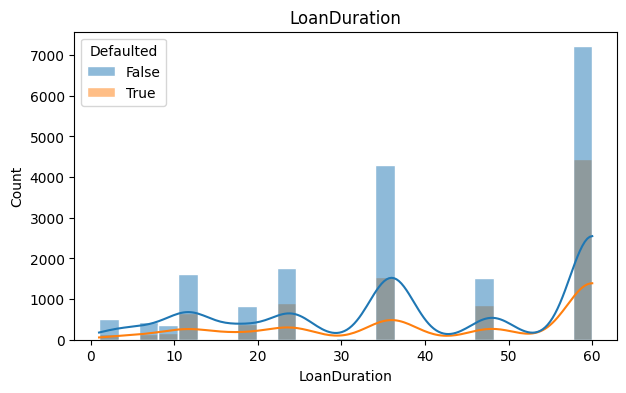

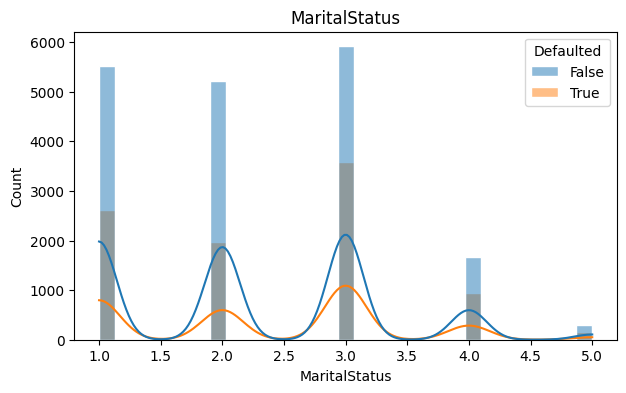

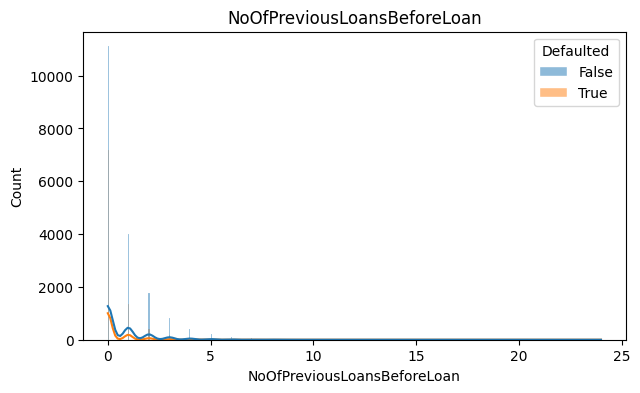

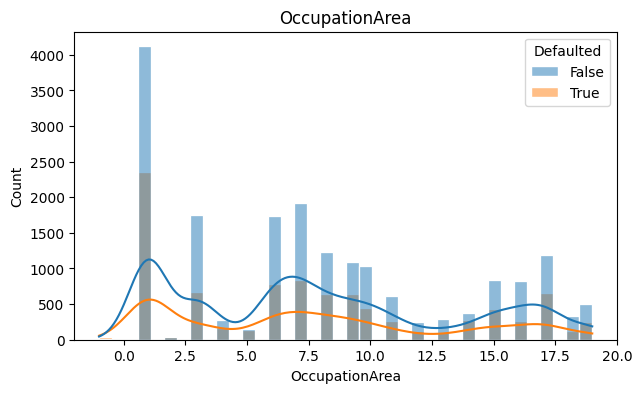

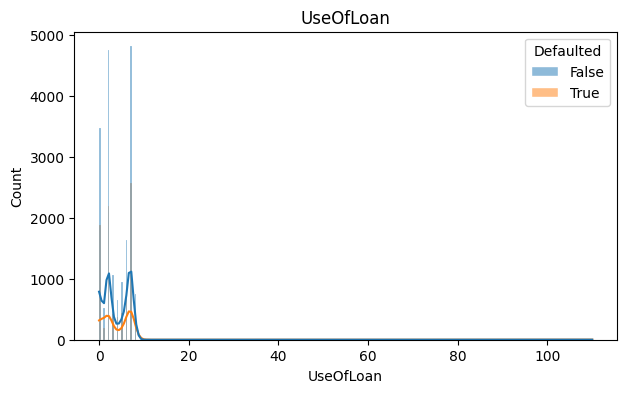

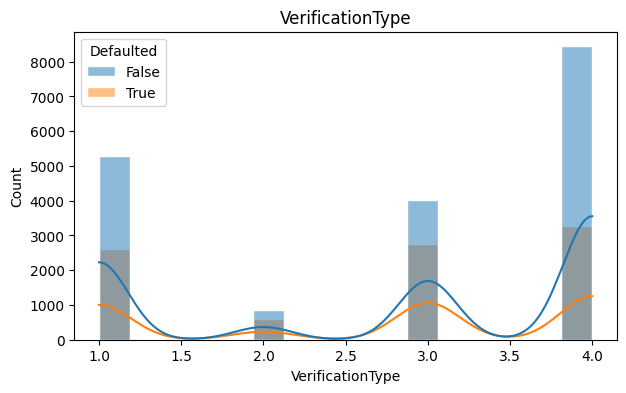

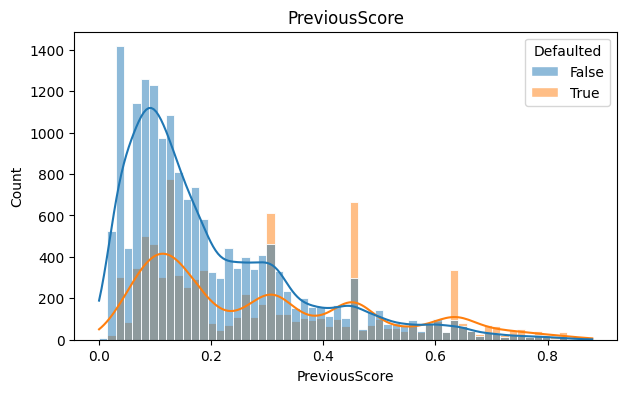

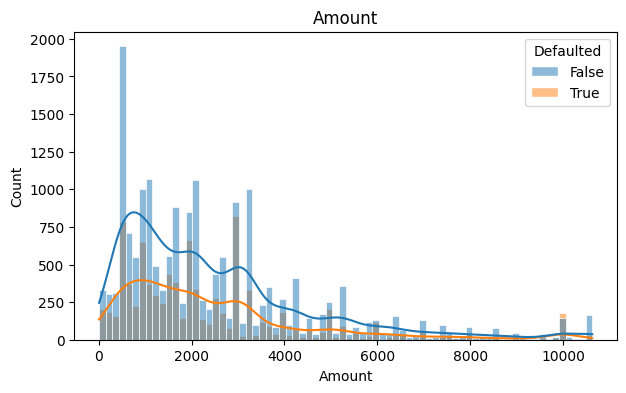

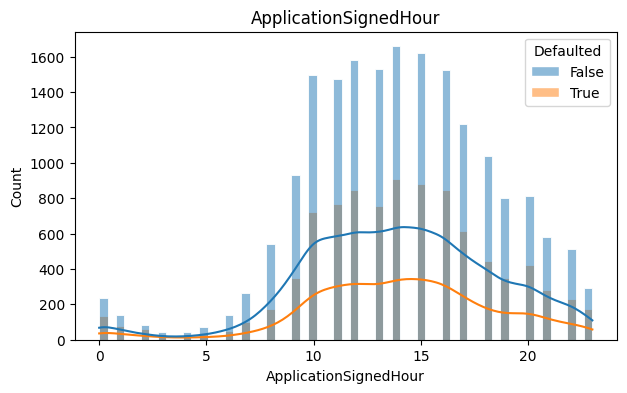

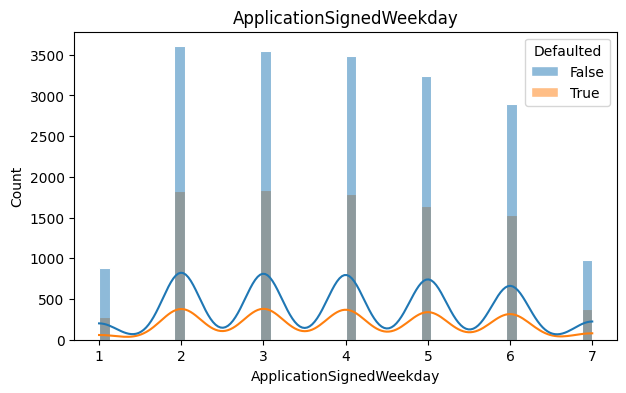

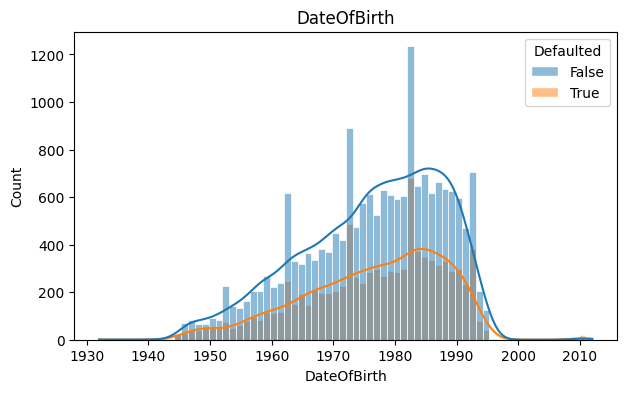

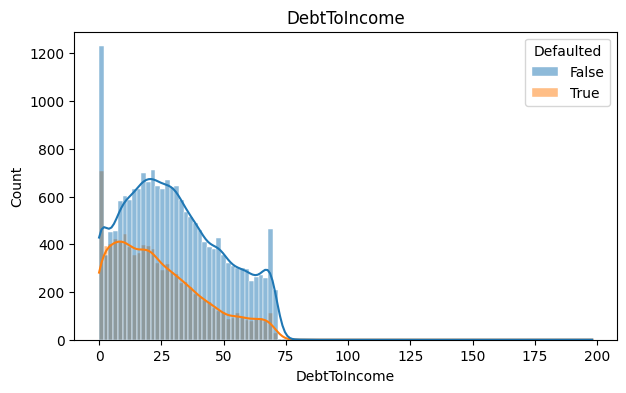

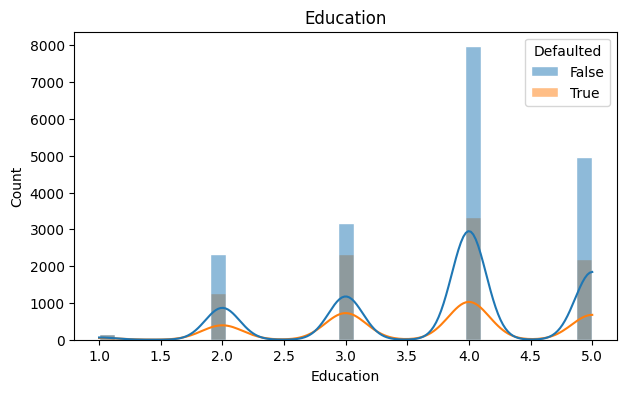

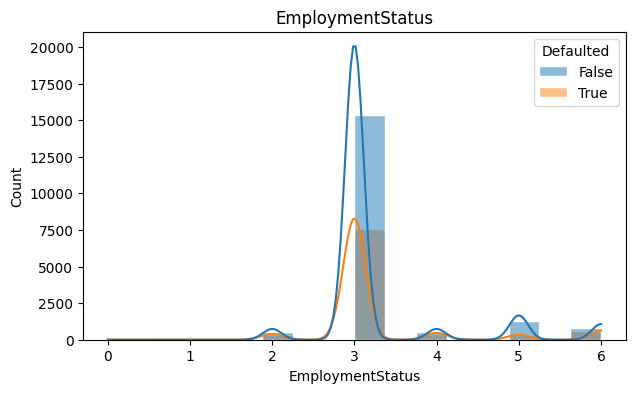

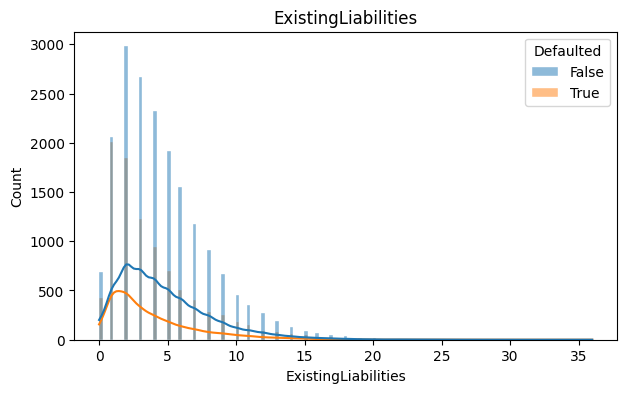

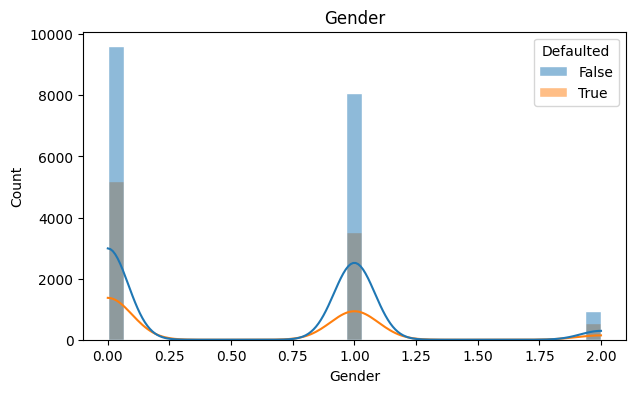

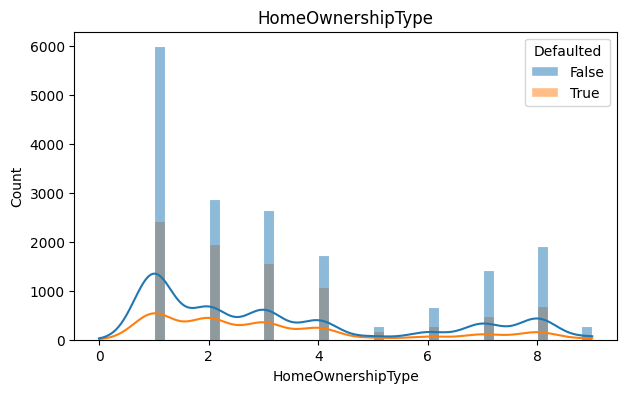

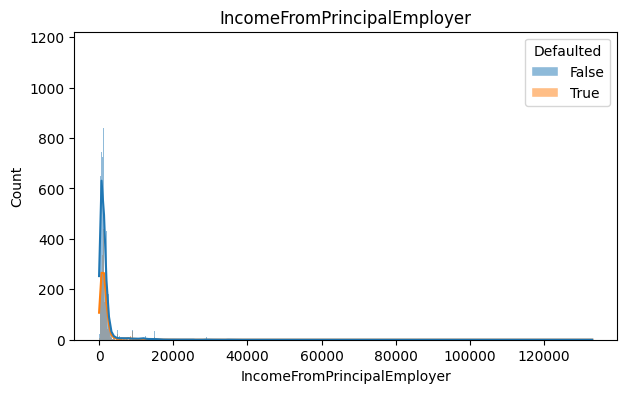

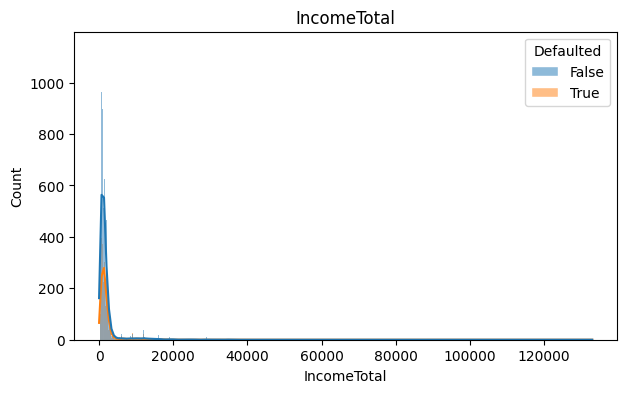

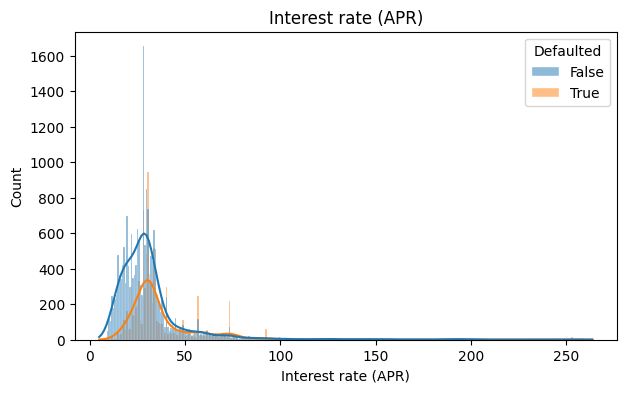

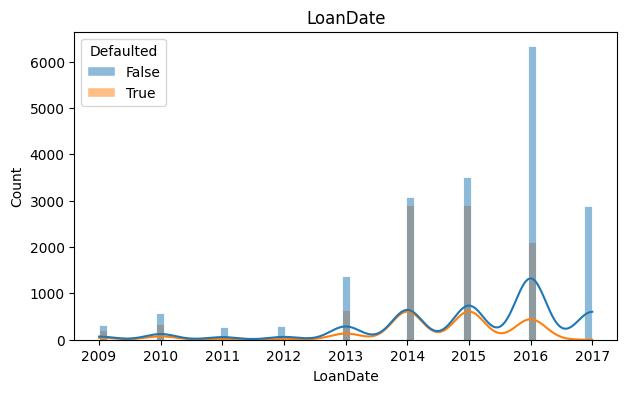

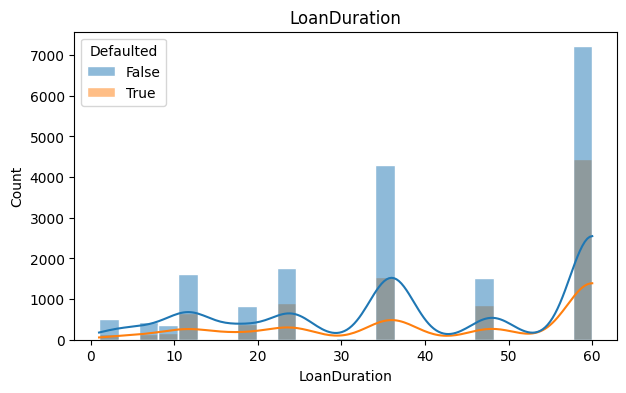

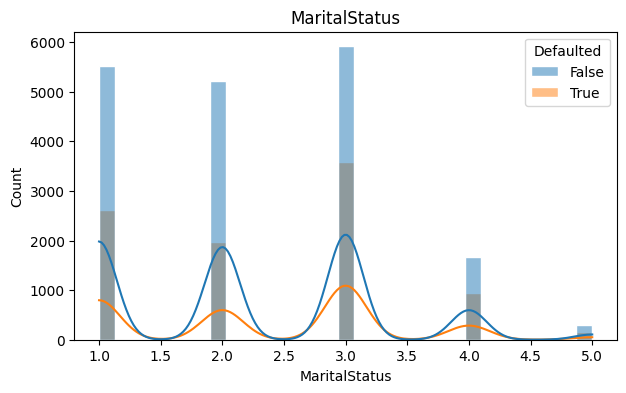

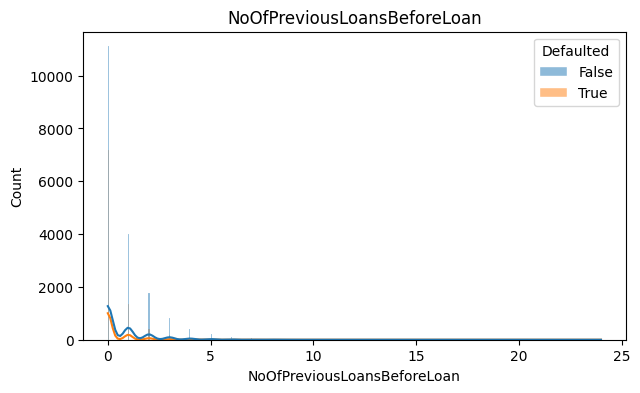

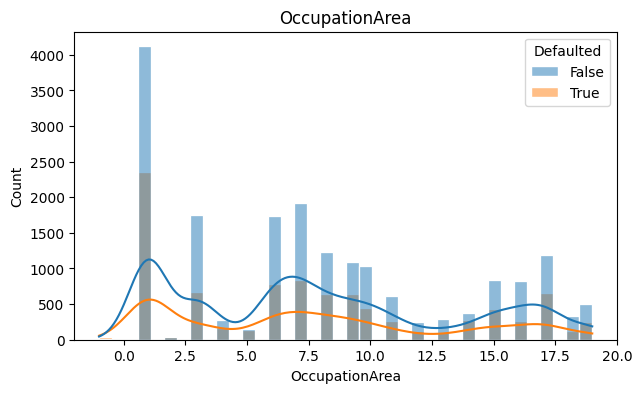

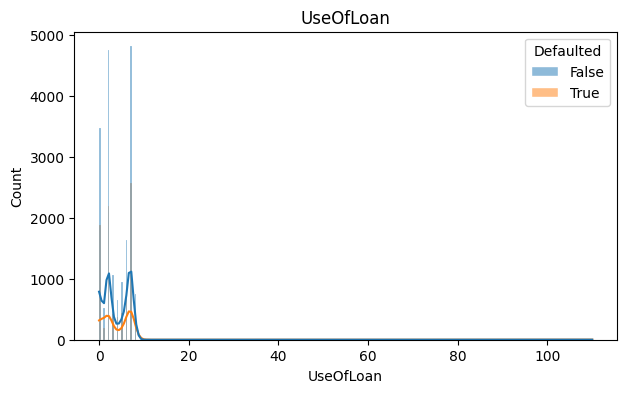

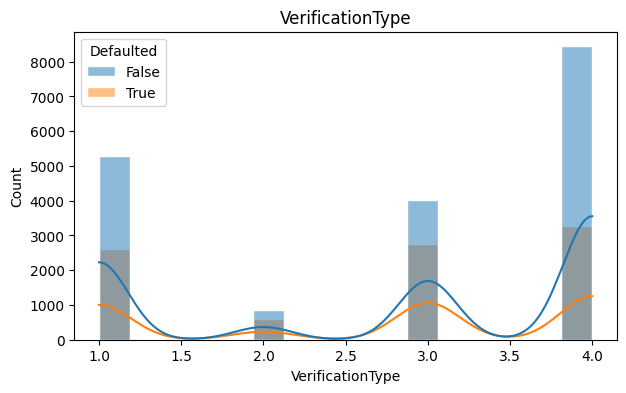

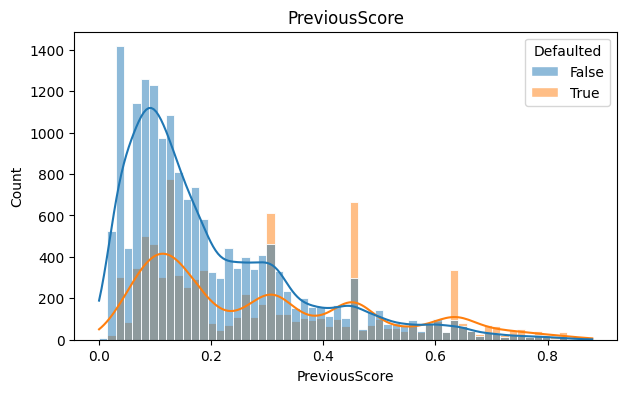

In [199]:
for i in num:
  plt.figure(figsize=(7,4))
  sns.histplot(data=df,x=i,edgecolor="w",hue="Defaulted",kde=True)
  plt.title(i)
  plt.show()

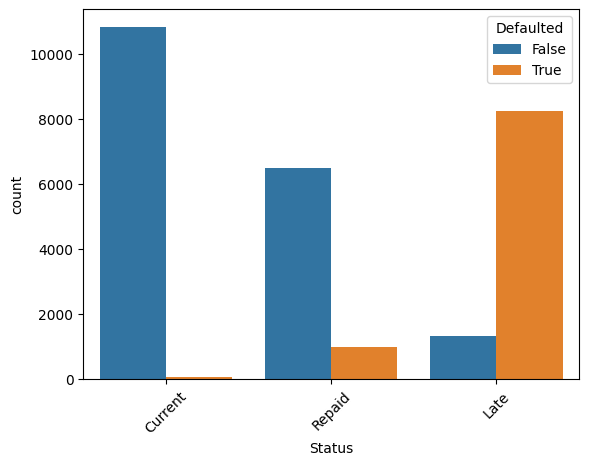

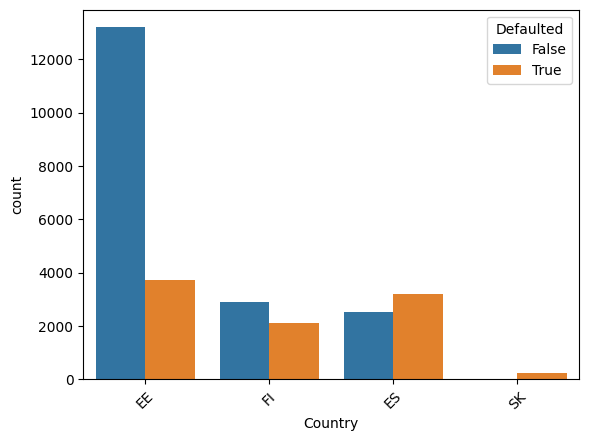

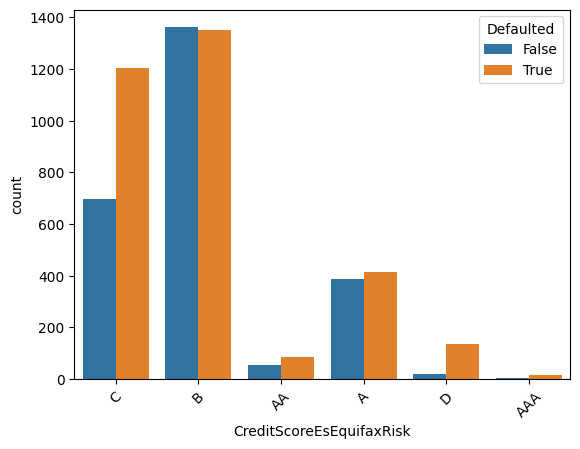

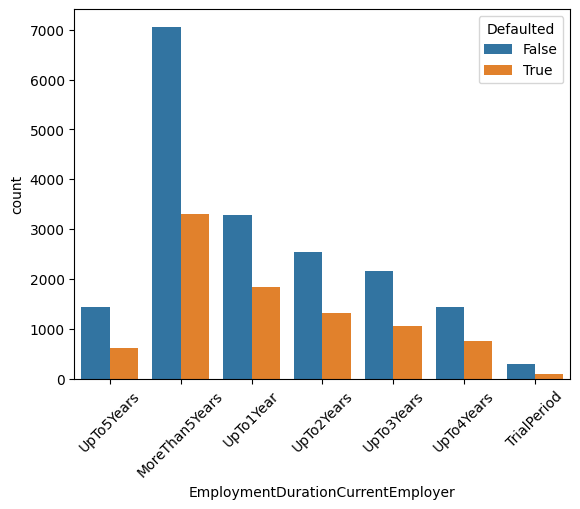

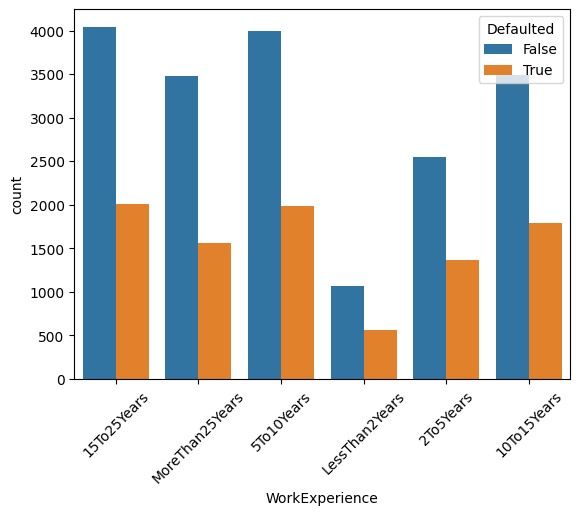

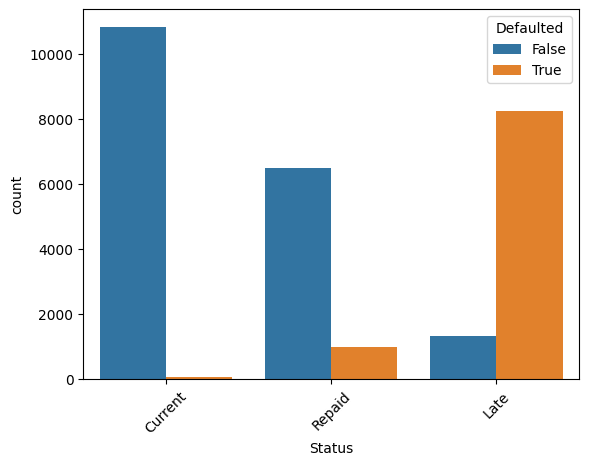

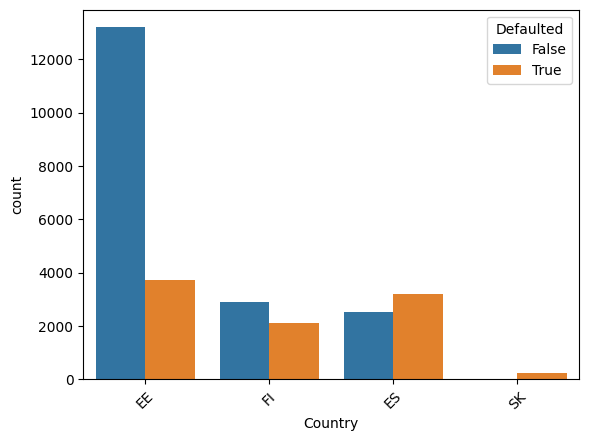

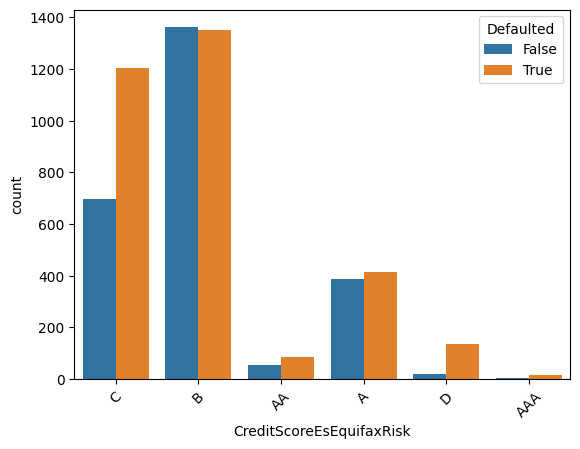

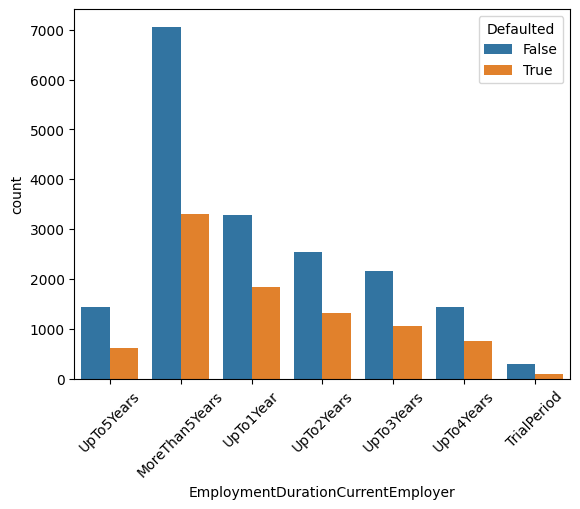

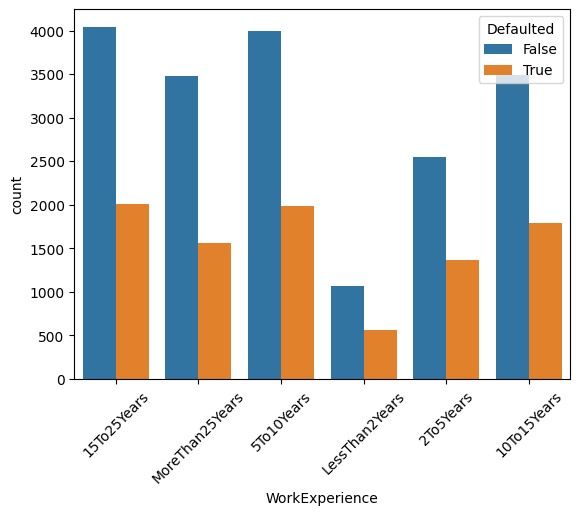

In [200]:
#creat subplots for the object type data
for i in categorical:
  sns.countplot(data=df,x=i,hue="Defaulted")
  plt.xticks(rotation=45)
  plt.show()

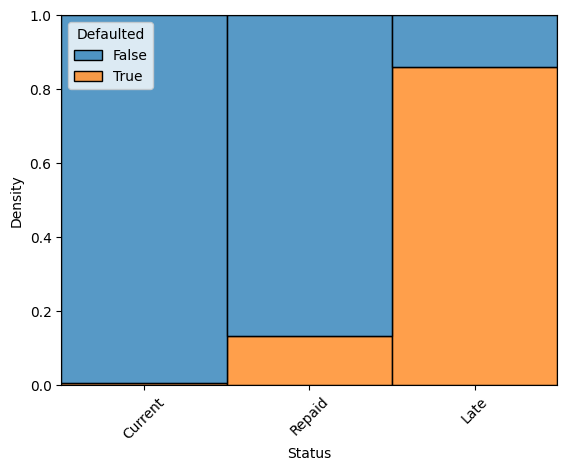

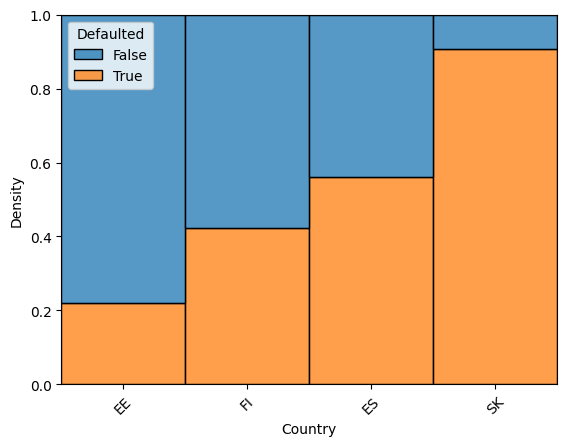

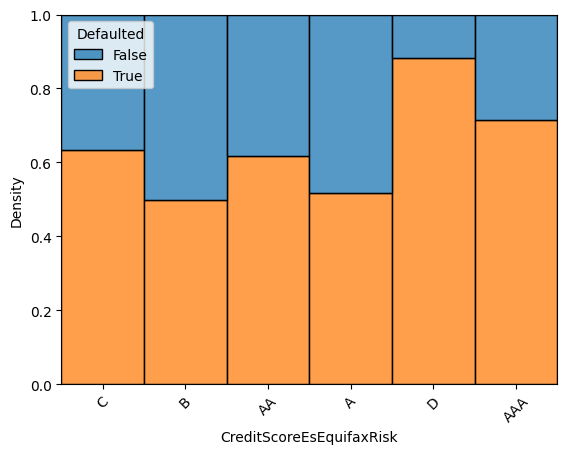

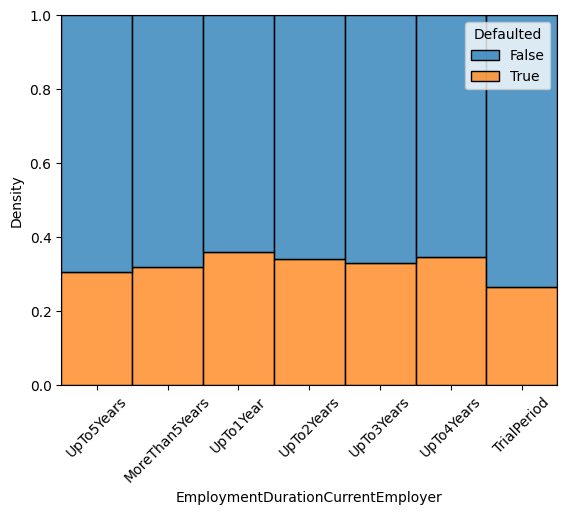

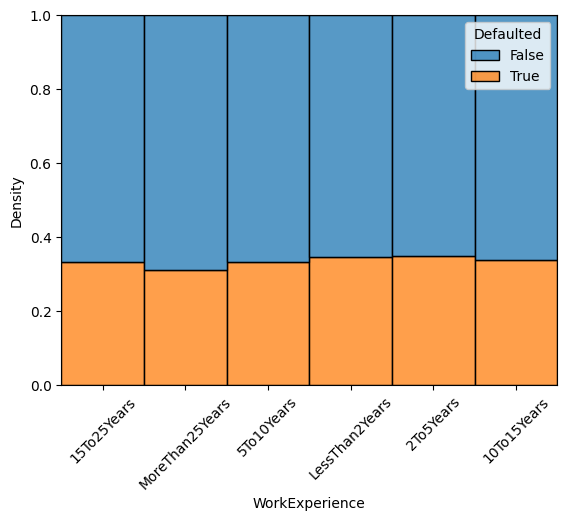

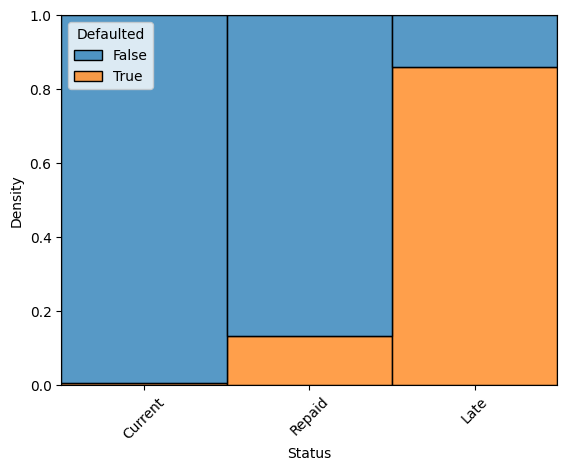

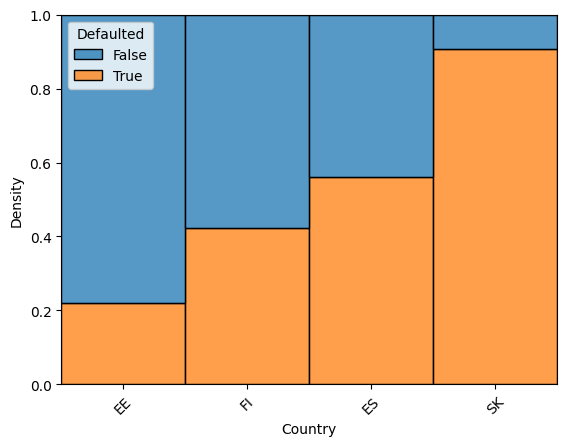

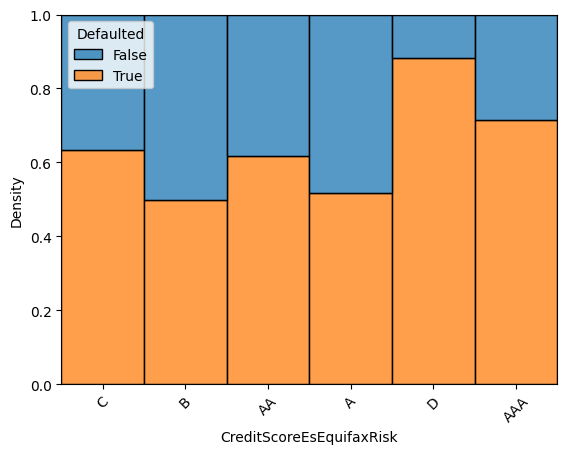

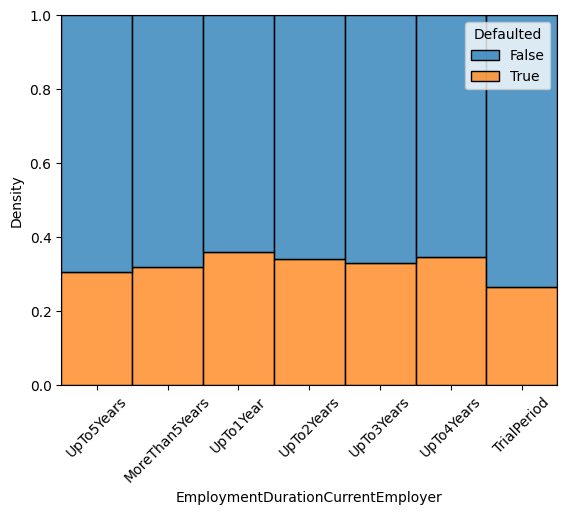

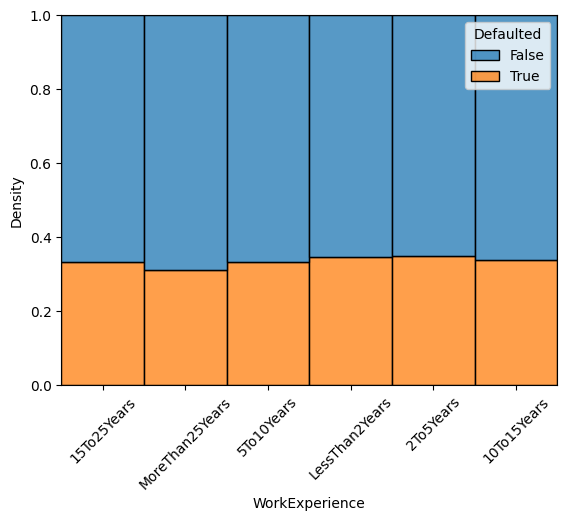

In [201]:
#creat subplots for the object type data
for i in categorical:
  sns.histplot(data=df,x=i,hue="Defaulted",kde=False,fill=True,stat="density",multiple="fill")
  plt.xticks(rotation=45)
  plt.show()

# Data Preprocessing part-II

In [202]:
#check the amount of missing value
df.isnull().sum()

Status                                   0
Amount                                   0
ApplicationSignedHour                    0
ApplicationSignedWeekday                 0
Country                                  0
CreditScoreEsEquifaxRisk             22192
DateOfBirth                              0
DebtToIncome                            41
Education                               41
EmploymentDurationCurrentEmployer      693
EmploymentStatus                       182
ExistingLiabilities                      0
Gender                                  41
HomeOwnershipType                     1350
IncomeFromPrincipalEmployer              0
IncomeTotal                              0
Interest rate (APR)                      0
LoanDate                                 0
LoanDuration                             0
MaritalStatus                           41
NewCreditCustomer                        0
NoOfPreviousLoansBeforeLoan              0
OccupationArea                          81
UseOfLoan  

Status                                   0
Amount                                   0
ApplicationSignedHour                    0
ApplicationSignedWeekday                 0
Country                                  0
CreditScoreEsEquifaxRisk             22192
DateOfBirth                              0
DebtToIncome                            41
Education                               41
EmploymentDurationCurrentEmployer      693
EmploymentStatus                       182
ExistingLiabilities                      0
Gender                                  41
HomeOwnershipType                     1350
IncomeFromPrincipalEmployer              0
IncomeTotal                              0
Interest rate (APR)                      0
LoanDate                                 0
LoanDuration                             0
MaritalStatus                           41
NewCreditCustomer                        0
NoOfPreviousLoansBeforeLoan              0
OccupationArea                          81
UseOfLoan  

In [203]:
#check the amount of missing value in percentage
(df.isnull().sum()*100)/df.shape[0]

Status                                0.000000
Amount                                0.000000
ApplicationSignedHour                 0.000000
ApplicationSignedWeekday              0.000000
Country                               0.000000
CreditScoreEsEquifaxRisk             79.492782
DateOfBirth                           0.000000
DebtToIncome                          0.146864
Education                             0.146864
EmploymentDurationCurrentEmployer     2.482358
EmploymentStatus                      0.651933
ExistingLiabilities                   0.000000
Gender                                0.146864
HomeOwnershipType                     4.835763
IncomeFromPrincipalEmployer           0.000000
IncomeTotal                           0.000000
Interest rate (APR)                   0.000000
LoanDate                              0.000000
LoanDuration                          0.000000
MaritalStatus                         0.146864
NewCreditCustomer                     0.000000
NoOfPreviousL

Status                                0.000000
Amount                                0.000000
ApplicationSignedHour                 0.000000
ApplicationSignedWeekday              0.000000
Country                               0.000000
CreditScoreEsEquifaxRisk             79.492782
DateOfBirth                           0.000000
DebtToIncome                          0.146864
Education                             0.146864
EmploymentDurationCurrentEmployer     2.482358
EmploymentStatus                      0.651933
ExistingLiabilities                   0.000000
Gender                                0.146864
HomeOwnershipType                     4.835763
IncomeFromPrincipalEmployer           0.000000
IncomeTotal                           0.000000
Interest rate (APR)                   0.000000
LoanDate                              0.000000
LoanDuration                          0.000000
MaritalStatus                         0.146864
NewCreditCustomer                     0.000000
NoOfPreviousL

In [204]:
#check the amount of missing value in percentage
missing=(df.isnull().sum()*100)/df.shape[0]
missing[missing>0].sort_values(ascending=False)

CreditScoreEsEquifaxRisk             79.492782
PreviousScore                         7.830354
HomeOwnershipType                     4.835763
EmploymentDurationCurrentEmployer     2.482358
EmploymentStatus                      0.651933
OccupationArea                        0.290146
WorkExperience                        0.171938
DebtToIncome                          0.146864
Education                             0.146864
Gender                                0.146864
MaritalStatus                         0.146864
VerificationType                      0.146864
dtype: float64

CreditScoreEsEquifaxRisk             79.492782
PreviousScore                         7.830354
HomeOwnershipType                     4.835763
EmploymentDurationCurrentEmployer     2.482358
EmploymentStatus                      0.651933
OccupationArea                        0.290146
WorkExperience                        0.171938
DebtToIncome                          0.146864
Education                             0.146864
Gender                                0.146864
MaritalStatus                         0.146864
VerificationType                      0.146864
dtype: float64

In [205]:
#Droping the CreditScoreEsEquifaxRisk because of 80% missing values
df=df.drop("CreditScoreEsEquifaxRisk",axis=1)

In [206]:
#Fill null previous score with median values
median_value=df["PreviousScore"].median()
df["PreviousScore"]=df["PreviousScore"].fillna(median_value)

In [207]:
#Remove the null value from the rest
df.dropna(inplace=True)

In [208]:
df.shape #no of rows and col left after dropping values...

(26231, 27)

(26231, 27)

In [209]:
#again checking the amount of missing value in percentage
missing=(df.isnull().sum()*100)/df.shape[0]
missing[missing>0].sort_values(ascending=False)

Series([], dtype: float64)

Series([], dtype: float64)

In [210]:
#Conclusion=No missing value left..

# LABEL ENCODING FOR OBJECT DATATYPES

In [211]:
for col in df.select_dtypes("object"):
  print (col,df[col].unique(),"\n")


Status ['Current' 'Repaid' 'Late'] 

Country ['EE' 'FI' 'ES' 'SK'] 

EmploymentDurationCurrentEmployer ['UpTo5Years' 'MoreThan5Years' 'UpTo1Year' 'UpTo2Years' 'UpTo3Years'
 'UpTo4Years' 'TrialPeriod'] 

WorkExperience ['15To25Years' 'MoreThan25Years' '5To10Years' 'LessThan2Years' '2To5Years'
 '10To15Years'] 

Status ['Current' 'Repaid' 'Late'] 

Country ['EE' 'FI' 'ES' 'SK'] 

EmploymentDurationCurrentEmployer ['UpTo5Years' 'MoreThan5Years' 'UpTo1Year' 'UpTo2Years' 'UpTo3Years'
 'UpTo4Years' 'TrialPeriod'] 

WorkExperience ['15To25Years' 'MoreThan25Years' '5To10Years' 'LessThan2Years' '2To5Years'
 '10To15Years'] 



In [212]:
from sklearn.preprocessing import LabelEncoder
#Loop over each column
for col in df.select_dtypes("object"):

  #Initialize LabelEncoder
  labelEncoder=LabelEncoder()

  #Fit encoder
  labelEncoder.fit(df[col].unique()) #change the value to numerical type...

  #Transform the column using the encoder
  df[col]=labelEncoder.transform(df[col])

  print(col,df[col].unique(),"\n")



Status [0 2 1] 

Country [0 2 1 3] 

EmploymentDurationCurrentEmployer [6 0 2 3 4 5 1] 

WorkExperience [1 5 3 4 2 0] 

Status [0 2 1] 

Country [0 2 1 3] 

EmploymentDurationCurrentEmployer [6 0 2 3 4 5 1] 

WorkExperience [1 5 3 4 2 0] 



<Axes: >

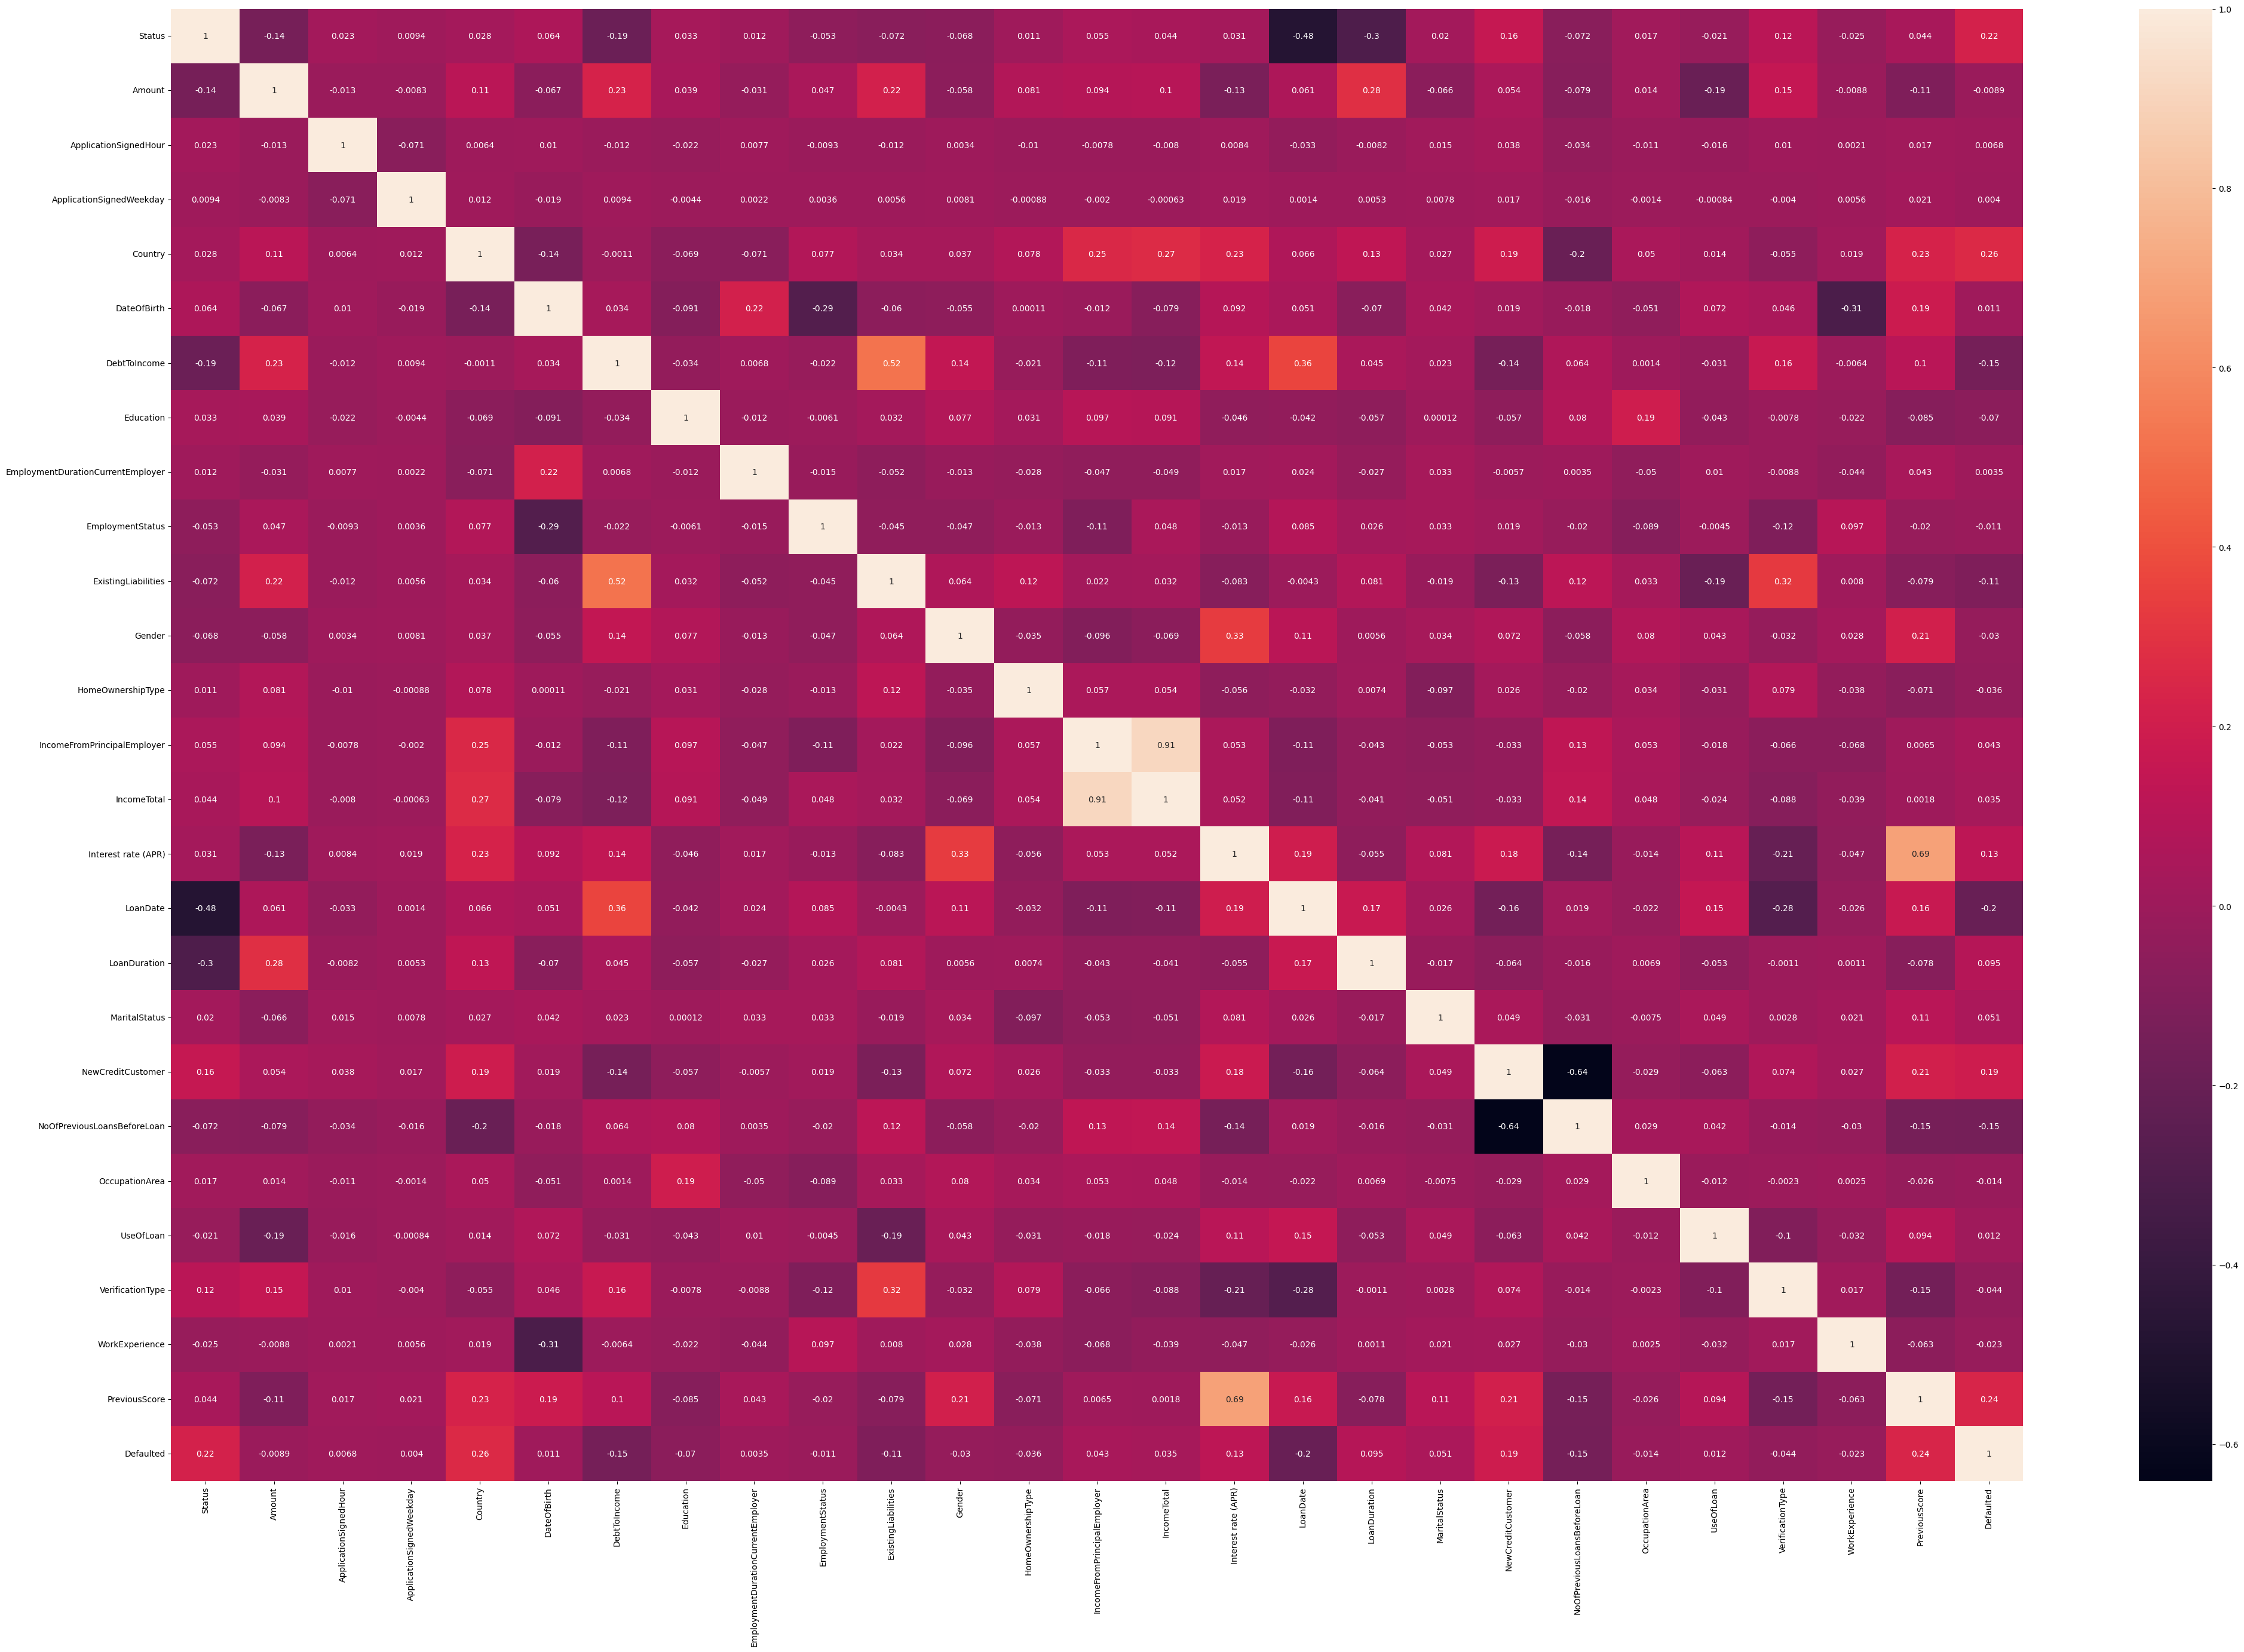

In [216]:
#Correlation Hearmap
plt.figure(figsize=(50,32))
sns.heatmap(df.corr(),annot=True)

# Train Test Split

In [247]:
df

Status  Amount  ApplicationSignedHour  ApplicationSignedWeekday  \
0           0  5000.0                     12                         4   
1           2   530.0                     14                         2   
2           0  5500.0                     22                         4   
3           2  6900.0                     15                         3   
4           0  2655.0                     10                         3   
...       ...     ...                    ...                       ...   
27912       1  3310.0                     22                         5   
27913       1  2000.0                      7                         2   
27914       2  1485.0                     14                         4   
27915       0  3000.0                     20                         2   
27916       1  1300.0                     10                         2   

       Country  DateOfBirth  DebtToIncome  Education  \
0            0         1975         51.52        4.0   
1            0         1969         30.32        4.0   
2            0         1965         29.57        4.0   
3            0         1983         45.75        2.0   
4            0         1980         25.40        4.0   
...        ...          ...           ...        ...   
27912        2         1975         31.22        3.0   
27913        2         1976          9.40        3.0   
27914        1         1978         30.13        3.0   
27915        0         1957         25.35        3.0   
27916        0         1950         56.59        4.0   

       EmploymentDurationCurrentEmployer  EmploymentStatus  ...  LoanDuration  \
0                                      6               3.0  ...            60   
1                                      0               3.0  ...            60   
2                                      0               5.0  ...            60   
3                                      0               3.0  ...            60   
4                                      0               3.0  ...            60   
...                                  ...               ...  ...           ...   
27912                                  0               3.0  ...            60   
27913                                  6               3.0  ...            60   
27914                                  0               3.0  ...            60   
27915                                  4               3.0  ...            60   
27916                                  0               4.0  ...            48   

       MaritalStatus  NewCreditCustomer  NoOfPreviousLoansBeforeLoan  \
0                4.0              False                            1   
1                1.0               True                            0   
2                4.0               True                            0   
3                3.0              False                            1   
4                3.0               True                            0   
...              ...                ...                          ...   
27912            3.0              False                            1   
27913            1.0               True                            0   
27914            3.0              False                            3   
27915            1.0               True                            0   
27916            1.0              False                            4   

       OccupationArea  UseOfLoan  VerificationType  WorkExperience  \
0                 8.0          0               1.0               1   
1                 1.0          2               4.0               1   
2                13.0          2               3.0               5   
3                19.0          7               4.0               3   
4                17.0          2               4.0               3   
...               ...        ...               ...             ...   
27912             1.0          6               3.0               1   
27913             1.0          6               

In [248]:
x=df.drop("Defaulted",axis=1)
y=df["Defaulted"]
y

0        False
1        False
2        False
3        False
4        False
         ...  
27912     True
27913     True
27914    False
27915    False
27916     True
Name: Defaulted, Length: 26231, dtype: bool

In [249]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42
                                               )

# Remove Outliers

In [250]:
from scipy import stats


# Define the columns for which you want to remove outliers
selected_columns = ['Amount', 'ApplicationSignedHour', 'DateOfBirth',
                    'DebtToIncome', 'ExistingLiabilities', 'IncomeFromPrincipalEmployer',
                    'IncomeTotal', 'Interest rate (APR)', 'NoOfPreviousLoansBeforeLoan',
                    'UseOfLoan', 'PreviousScore']
#Calc the zscores
z_scores=(stats.zscore(x_train[selected_columns]))
zs=np.abs(z_scores) #absolute will turn -ve to +ve values....
zs

Amount  ApplicationSignedHour  DateOfBirth  DebtToIncome  \
24318  1.026477               0.424759     1.273462      1.044205   
6409   1.791617               0.696573     0.317320      0.607569   
14199  0.758851               0.649025     0.212941      0.326168   
6625   0.286542               0.472307     1.096709      0.518744   
26909  2.126956               3.115955     0.654825      0.286571   
...         ...                    ...          ...           ...   
23261  0.395173               0.472307     0.935957      0.500609   
7007   0.192080               0.472307     0.124564      0.868160   
2200   0.627445               0.023774     0.654825      1.570737   
17481  2.533142               1.546091     0.478071      0.627426   
25340  0.347942               0.248041     0.935957      0.365230   

       ExistingLiabilities  IncomeFromPrincipalEmployer  IncomeTotal  \
24318             1.044012                     0.217334     0.066481   
6409              0.996247                     0.096221     0.225498   
14199             0.169615                     0.413696     0.474410   
6625              1.044012                     0.400370     0.508718   
26909             0.752546                     0.604181     0.202140   
...                    ...                          ...          ...   
23261             6.242625                     0.425065     0.259917   
7007              0.461081                     0.182449     0.305792   
2200              0.169615                     9.232054     9.555805   
17481             0.461081                     0.374112     0.212471   
25340             0.169615                     0.017832     0.152503   

       Interest rate (APR)  NoOfPreviousLoansBeforeLoan  UseOfLoan  \
24318             0.506235                     0.470775   0.628296   
6409              0.540353                     0.470775   1.348139   
14199             0.355645                     1.006617   0.628296   
6625              0.148191                     0.470775   0.811390   
26909             0.482313                     0.267921   0.988217   
...                    ...                          ...        ...   
23261             1.678501                     0.470775   0.628296   
7007              0.047890                     0.470775   0.811390   
2200              0.008674                     1.006617   0.628296   
17481             0.241918                     0.470775   0.268374   
25340             0.052988                     0.470775   1.171311   

       PreviousScore  
24318       0.346773  
6409        1.066246  
14199       0.687932  
6625        2.317753  
26909       0.605738  
...              ...  
23261       1.730577  
7007        2.317753  
2200        0.361410  
17481       0.164935  
25340       0.377203  

[17574 rows x 11 columns]

In [251]:
#Set the threshold value for the outlier detection
threshold=3

#Find the indices of the outliers based on the threshold
outliers_index=np.where(z_scores>threshold)[0]

## Remove the outliers
x_train=x_train.drop(x_train.index[outliers_index])
y_train=y_train.drop(y_train.index[outliers_index])

# Decision Tree Classifier


In [256]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dtree=DecisionTreeClassifier() #object
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

#Perform a grid-search cross validation to find the best hyper-parameters
grid_search=GridSearchCV(dtree,param_grid,cv=5,verbose=1)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42]},
             verbose=1)

In [257]:
grid_search.best_params_

{'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'random_state': 42}

In [259]:
dtree=DecisionTreeClassifier(random_state=42,max_depth=3,min_samples_leaf=3,min_samples_split=2)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, random_state=42)

In [270]:
y_pred=dtree.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy Score =",round(accuracy*100),"%")

Accuracy Score = 94 %


In [285]:
from sklearn.metrics import f1_score,precision_score,recall_score
fscore=f1_score(y_test,y_pred)
pscore=precision_score(y_test,y_pred)
rcall=recall_score(y_test,y_pred)

print("F1 socre is",fscore)
print("Precision score",pscore)
print("Recall score",rcall)

F1 socre is 0.9065026362038665
Precision score 0.8954861111111111
Recall score 0.9177935943060498


In [288]:
imp_df = pd.DataFrame({
    "Feature Name": x_train.columns,
    "Importance": dtree.feature_importances_
})
imp_df

Feature Name  Importance
0                              Status    0.952677
1                              Amount    0.000000
2               ApplicationSignedHour    0.000000
3            ApplicationSignedWeekday    0.000000
4                             Country    0.000000
5                         DateOfBirth    0.000000
6                        DebtToIncome    0.000000
7                           Education    0.000000
8   EmploymentDurationCurrentEmployer    0.000000
9                    EmploymentStatus    0.000000
10                ExistingLiabilities    0.000498
11                             Gender    0.000000
12                  HomeOwnershipType    0.000000
13        IncomeFromPrincipalEmployer    0.000000
14                        IncomeTotal    0.000000
15                Interest rate (APR)    0.000000
16                           LoanDate    0.044669
17                       LoanDuration    0.000000
18                      MaritalStatus    0.000000
19                  NewCreditCustomer    0.000000
20        NoOfPreviousLoansBeforeLoan    0.000000
21                     OccupationArea    0.000000
22                          UseOfLoan    0.000000
23                   VerificationType    0.000000
24                     WorkExperience    0.000000
25                      PreviousScore    0.002156

In [292]:
imp_df = pd.DataFrame({
    "Feature Name": x_train.columns,
    "Importance": dtree.feature_importances_
})

sort=imp_df.sort_values("Importance",ascending=False)
sort

Feature Name  Importance
0                              Status    0.952677
16                           LoanDate    0.044669
25                      PreviousScore    0.002156
10                ExistingLiabilities    0.000498
3            ApplicationSignedWeekday    0.000000
15                Interest rate (APR)    0.000000
24                     WorkExperience    0.000000
23                   VerificationType    0.000000
22                          UseOfLoan    0.000000
21                     OccupationArea    0.000000
20        NoOfPreviousLoansBeforeLoan    0.000000
19                  NewCreditCustomer    0.000000
18                      MaritalStatus    0.000000
17                       LoanDuration    0.000000
2               ApplicationSignedHour    0.000000
14                        IncomeTotal    0.000000
4                             Country    0.000000
1                              Amount    0.000000
12                  HomeOwnershipType    0.000000
11                             Gender    0.000000
9                    EmploymentStatus    0.000000
8   EmploymentDurationCurrentEmployer    0.000000
7                           Education    0.000000
6                        DebtToIncome    0.000000
5                         DateOfBirth    0.000000
13        IncomeFromPrincipalEmployer    0.000000

Text(0.5, 1.0, 'Top 10 Features(Decision Tree)')

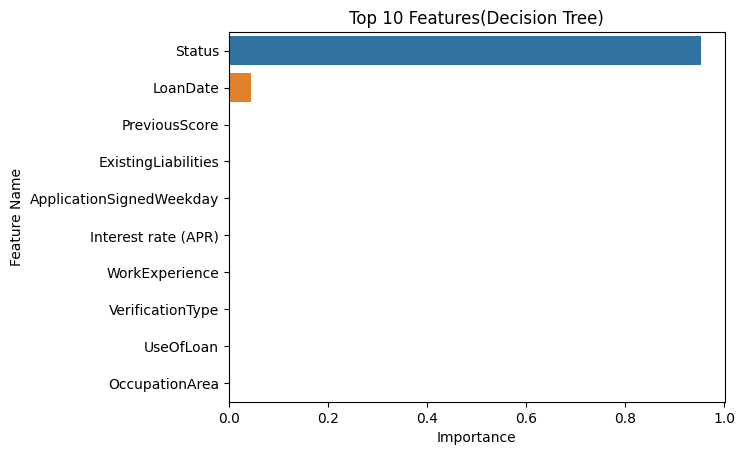

In [297]:
imp_df = pd.DataFrame({
    "Feature Name": x_train.columns,
    "Importance": dtree.feature_importances_
})

sort=imp_df.sort_values("Importance",ascending=False)

top10=sort.head(10)
sns.barplot(data=top10,x="Importance",y="Feature Name")
plt.title("Top 10 Features(Decision Tree)")

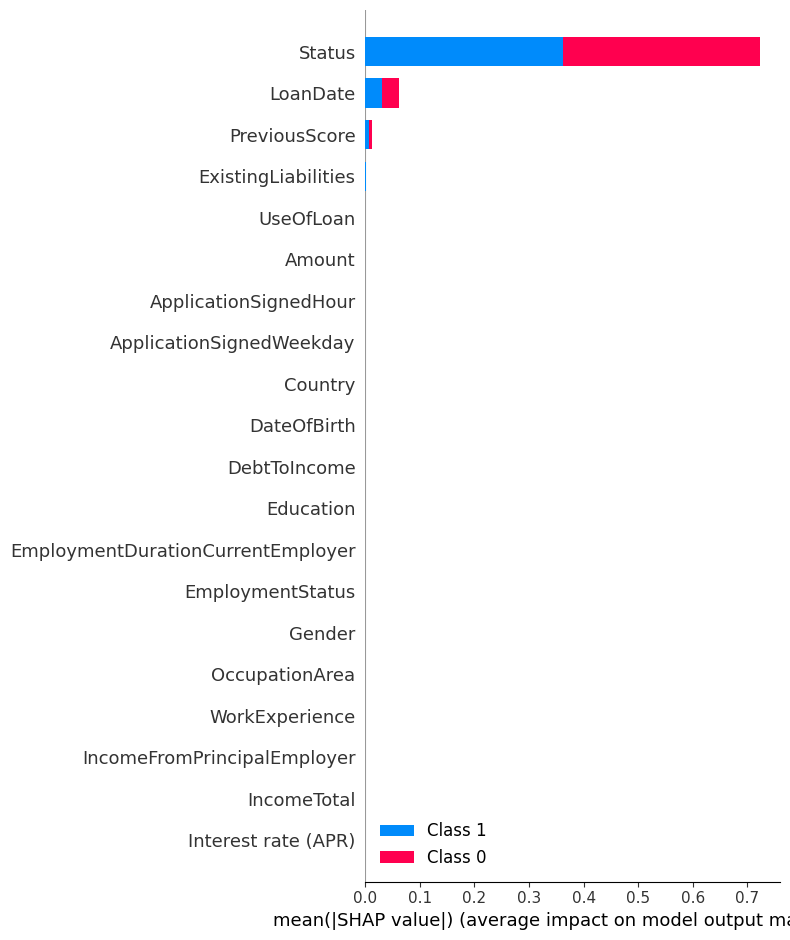

In [302]:
import shap
exp=shap.TreeExplainer(dtree)
shap_values=exp.shap_values(x_test)
shap.summary_plot(shap_values,x_test)


Text(50.722222222222214, 0.5, 'Actual label')

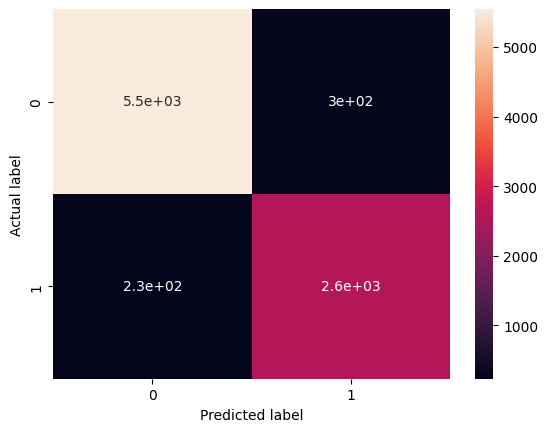

In [308]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(data=cm,annot=True)
plt.xlabel("Predicted label")
plt.ylabel("Actual label")

# Random Forest Classifier


In [318]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Rf=RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

#Perform the grid search with cross validation to find best hyperP
gscv=GridSearchCV(Rf,param_grid,cv=5,verbose=1)
gscv.fit(x_train,y_train)




Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200], 'random_state': [0, 42]},
             verbose=1)

In [339]:
gscv.best_params_

{'max_depth': 5, 'max_features': None, 'n_estimators': 100, 'random_state': 0}

In [340]:
rfc=RandomForestClassifier(max_depth=5,max_features=None,n_estimators=100,random_state=0)
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, max_features=None, random_state=0)

In [341]:
y_p=rfc.predict(x_test)
accu=round(accuracy_score(y_test,y_p)*100,2)
print("Accuracy Score is ",accu,"%")

Accuracy Score is  93.85 %


In [342]:
from sklearn.metrics import f1_score,precision_score,recall_score
fscore=f1_score(y_test,y_p)
pscore=precision_score(y_test,y_p)
rcall=recall_score(y_test,y_p)

print("F1 socre is",fscore)
print("Precision score",pscore)
print("Recall score",rcall)

F1 socre is 0.9065026362038665
Precision score 0.8954861111111111
Recall score 0.9177935943060498


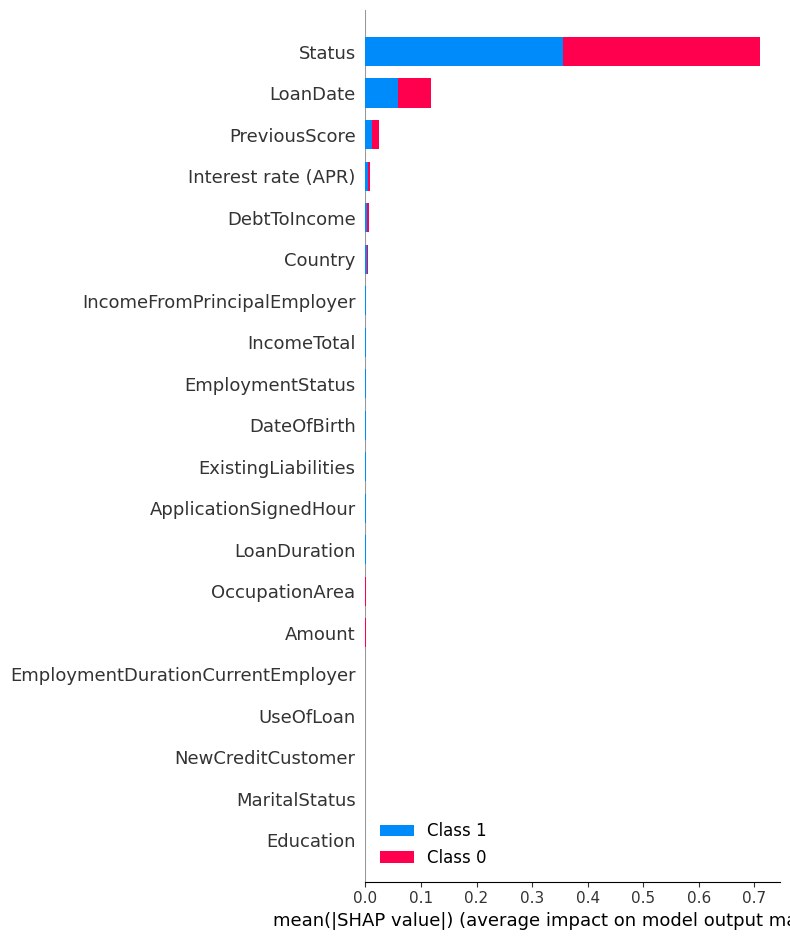

In [343]:
import shap
exp=shap.TreeExplainer(rfc)
shap_values=exp.shap_values(x_test)
shap.summary_plot(shap_values,x_test)

Text(50.722222222222214, 0.5, 'Actual label')

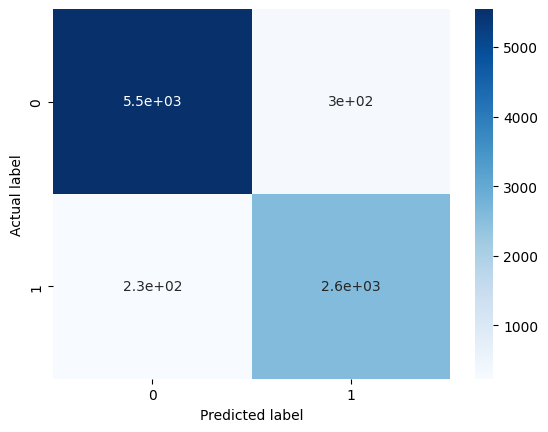

In [349]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_p)
sns.heatmap(data=cm,annot=True,cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("Actual label")